# TZ Gaming: Optimal Targeting of Mobile Ads

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

# increase plot resolution
mpl.rcParams["figure.dpi"] = 200

In [2]:
# check that you have version 0.9.13 of the pyrsm package
# install in a terminal using: pip install --user "pyrsm>=0.9.13"
rsm.__version__

'0.9.12'

In [3]:
# loading data tz_gaming.parquet
tz_gaming = pd.read_parquet('data/tz_gaming.parquet')
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrua,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,6.578947,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,0.689655,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833


> Note: Review the data description carefully and watch the "Video: TZ gaming preview (12 min)" linked on Canvas

In [4]:
pd.read_parquet('data/tz_gaming.parquet').to_csv('tz.csv')

In [5]:
# dataset description
tz_description = rsm.md("data/tz_gaming_description.md")

### TZ Gaming: Optimal Targeting of Mobile Ads

Each row in the `tz_gaming` dataset represents an impression. For each row (impression), we have data on 21 variables. All explanatory variables are created by Vneta based on one month tracking history of users, apps, and ads. The available variables are described in below. 

* _training_ -- Dummy variable that splits the dataset into a training ("train") and a test ("test") set
* _inum_ -- Impression number
* _click_ -- Click indicator for the TZ ad served in the impression. Equals "yes" if the ad was clicked and "no" otherwise
* _time_ -- The hour of the day in which the impression occurred (1-24). For example, "2" indicates the impression occurred between 1 am and 2 am
* _time\_fct_ -- Same as _time_ but the is coded as categorical 
* _app_ -- The app in which the impression was shown. Ranges from 1 to 49
* _mobile\_os_ -- Customer's mobile OS
* _impup_ -- Number of past impressions the user has seen in the app
* _clup_ -- Number of past impressions the user has clicked on in the app
* _ctrup_ -- Past CTR (Click-Through Rate) (x 100) for the user in the app
* _impua_ -- Number of past impressions of the TZ ad that the user has seen across all apps
* _clua_ -- Number of past impressions of the TZ ad that the user has clicked on across all apps
* _ctrua_ -- Past CTR (x 100) of the TZ ad by the user across all apps
* _imput_ -- Number of past impressions the user has seen within in the hour
* _clut_ -- Number of past impressions the user has clicked on in the hour
* _ctrut_ -- Past CTR (x 100) of the user in the hour
* _imppat_ -- Number of past impressions that showed the TZ ad in the app in the hour
* _clpat_ -- Number of past clicks the TZ ad has received in the app in the hour
* _ctrpat_ -- Past CTR (x 100) of the TZ ad in the app in the hour
* _rnd_ -- Simulated data from a normal distribution with mean 0 and a standard deviation of 1
* _pred\_vneta_ -- Predicted probability of click per impressions generated by Vneta's proprietary machine learning algorithm
* id -- Anonymized user ID

Note that there is a clear relationship between the impressions, clicks, and ctr variables within a strata. Specifically: 

* ctrup = clup/impup
* ctru = clu/impu
* ctrut = clut/imput
* ctrpat = clpat/impat

The last three letters of a feature indicate the sources of variation in a variable:

* u — denotes user
* t — denotes time
* p — denotes app
* a — denotes ad 



> Note: Full question details are contained in the tz-gaming-msba.pdf file


#### Performing some preliminary analysis, checking nulls etc.

In [6]:
tz_gaming['click'].value_counts()

click
no     114443
yes      1045
Name: count, dtype: int64

In [7]:
tz_gaming.click.value_counts(dropna=False)

click
no     114443
yes      1045
Name: count, dtype: int64

No NULLS -- as expected

## Part I: Logistic regression (10 points)

a. Estimate a logistic regression model with the following variables `time_fct app mobile_os impua clua ctrua` as the explanatory variables (features) and `click` as the response variable (target)

> Note: Use only the rows that are labeled `train` in the `training` variable

In [8]:
feature_matrix = ['time_fct','app','mobile_os','impua','clua','ctrua']

lr = rsm.model.logistic(
    data={'tz gaming':tz_gaming[tz_gaming['training'] == 'train']},
    rvar='click',
    lev='yes',
    evar=feature_matrix
)
lr.summary()

Logistic regression (GLM)
Data                 : tz gaming
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, mobile_os, impua, clua, ctrua
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                     OR      OR%  coefficient   std.error  z.value p.value     
Intercept         0.029   -97.1%        -3.53       0.197  -17.936  < .001  ***
time_fct[2]       0.622   -37.8%        -0.47       0.321   -1.478   0.139     
time_fct[3]       0.718   -28.2%        -0.33       0.454   -0.730   0.466     
time_fct[4]       0.000  -100.0%       -23.54   42007.161   -0.001     1.0     
time_fct[5]       0.000  -100.0%       -23.72   55229.970   -0.000     1.0     
time_fct[6]       0.349   -65.1%        -1.05       1.021   -1.030   0.303     
time_fct[7]       1.221    22.1%         0.20       0.426    0.468    0.64     
time_fct[8]       1.104    10.4%         0.10       0.296    0.335   0.737     
time_fct

b. Summarize and interpret the logistic regression results. Which of these explanatory variables are statistically significant? Which variables seem to be most "important"? Make sure your model evaluation includes (1) an interpretation of the Permutation importance and Prediction plots for the explanatory variables `mobile_os`, `impua`, `clua`, and `ctrua` and (2) an evaluation of the model as a whole using Pseudo R-squared and the Chi-square test (5 points).

In [9]:
# discuss and add code to calculate additional statistics as needed
lr.summary(main=False, fit=True, vif=True)


Pseudo R-squared (McFadden): 0.109
Pseudo R-squared (McFadden adjusted): 0.092
Area under the RO Curve (AUC): 0.792
Log-likelihood: -3946.072, AIC: 8046.145, BIC: 8768.389
Chi-squared: 968.279, df(76), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

             vif    Rsq
clua       1.292  0.226
app        1.250  0.200
impua      1.239  0.193
ctrua      1.174  0.148
time_fct   1.051  0.048
mobile_os  1.002  0.002


#### Interpretation of performance metrics:

Pseudo R-squared:
-   The pseudo R-squared of 0.109 indicates a moderate level of performance given it is far below the benchmark of 0.2 which is synonymous with strong models. 

Area Under the Curve (AUC) of Receiver Operating Characteristic (ROC): 0.792:

-   An AUC of 0.792 is relatively high, indicating good discriminatory power. This means the model is quite effective at distinguishing between the positive and negative classes. We learnt that AUC values closer to 1.0 are typically desired, with values above 0.8 often considered as a good benchmark based on which this model is promising

Chi-Squared (χ²) Statistic: 968.279

-   A chi-squared value of 968.279 suggests that the model is significantly better than the null model (a model with no predictors). This is an indication that the predictors included in the model have a substantial and statistically significant relationship with the response variable.

P-value: <0.001

-   The p-value being less than 0.001 indicates that the model coefficients are statistically significant since it is below the 0.05 threshold. In other words, there is strong evidence to reject the null hypothesis that the model with predictors does not explain the variability in the response variable better than a model without any predictor

#### Prediction plots

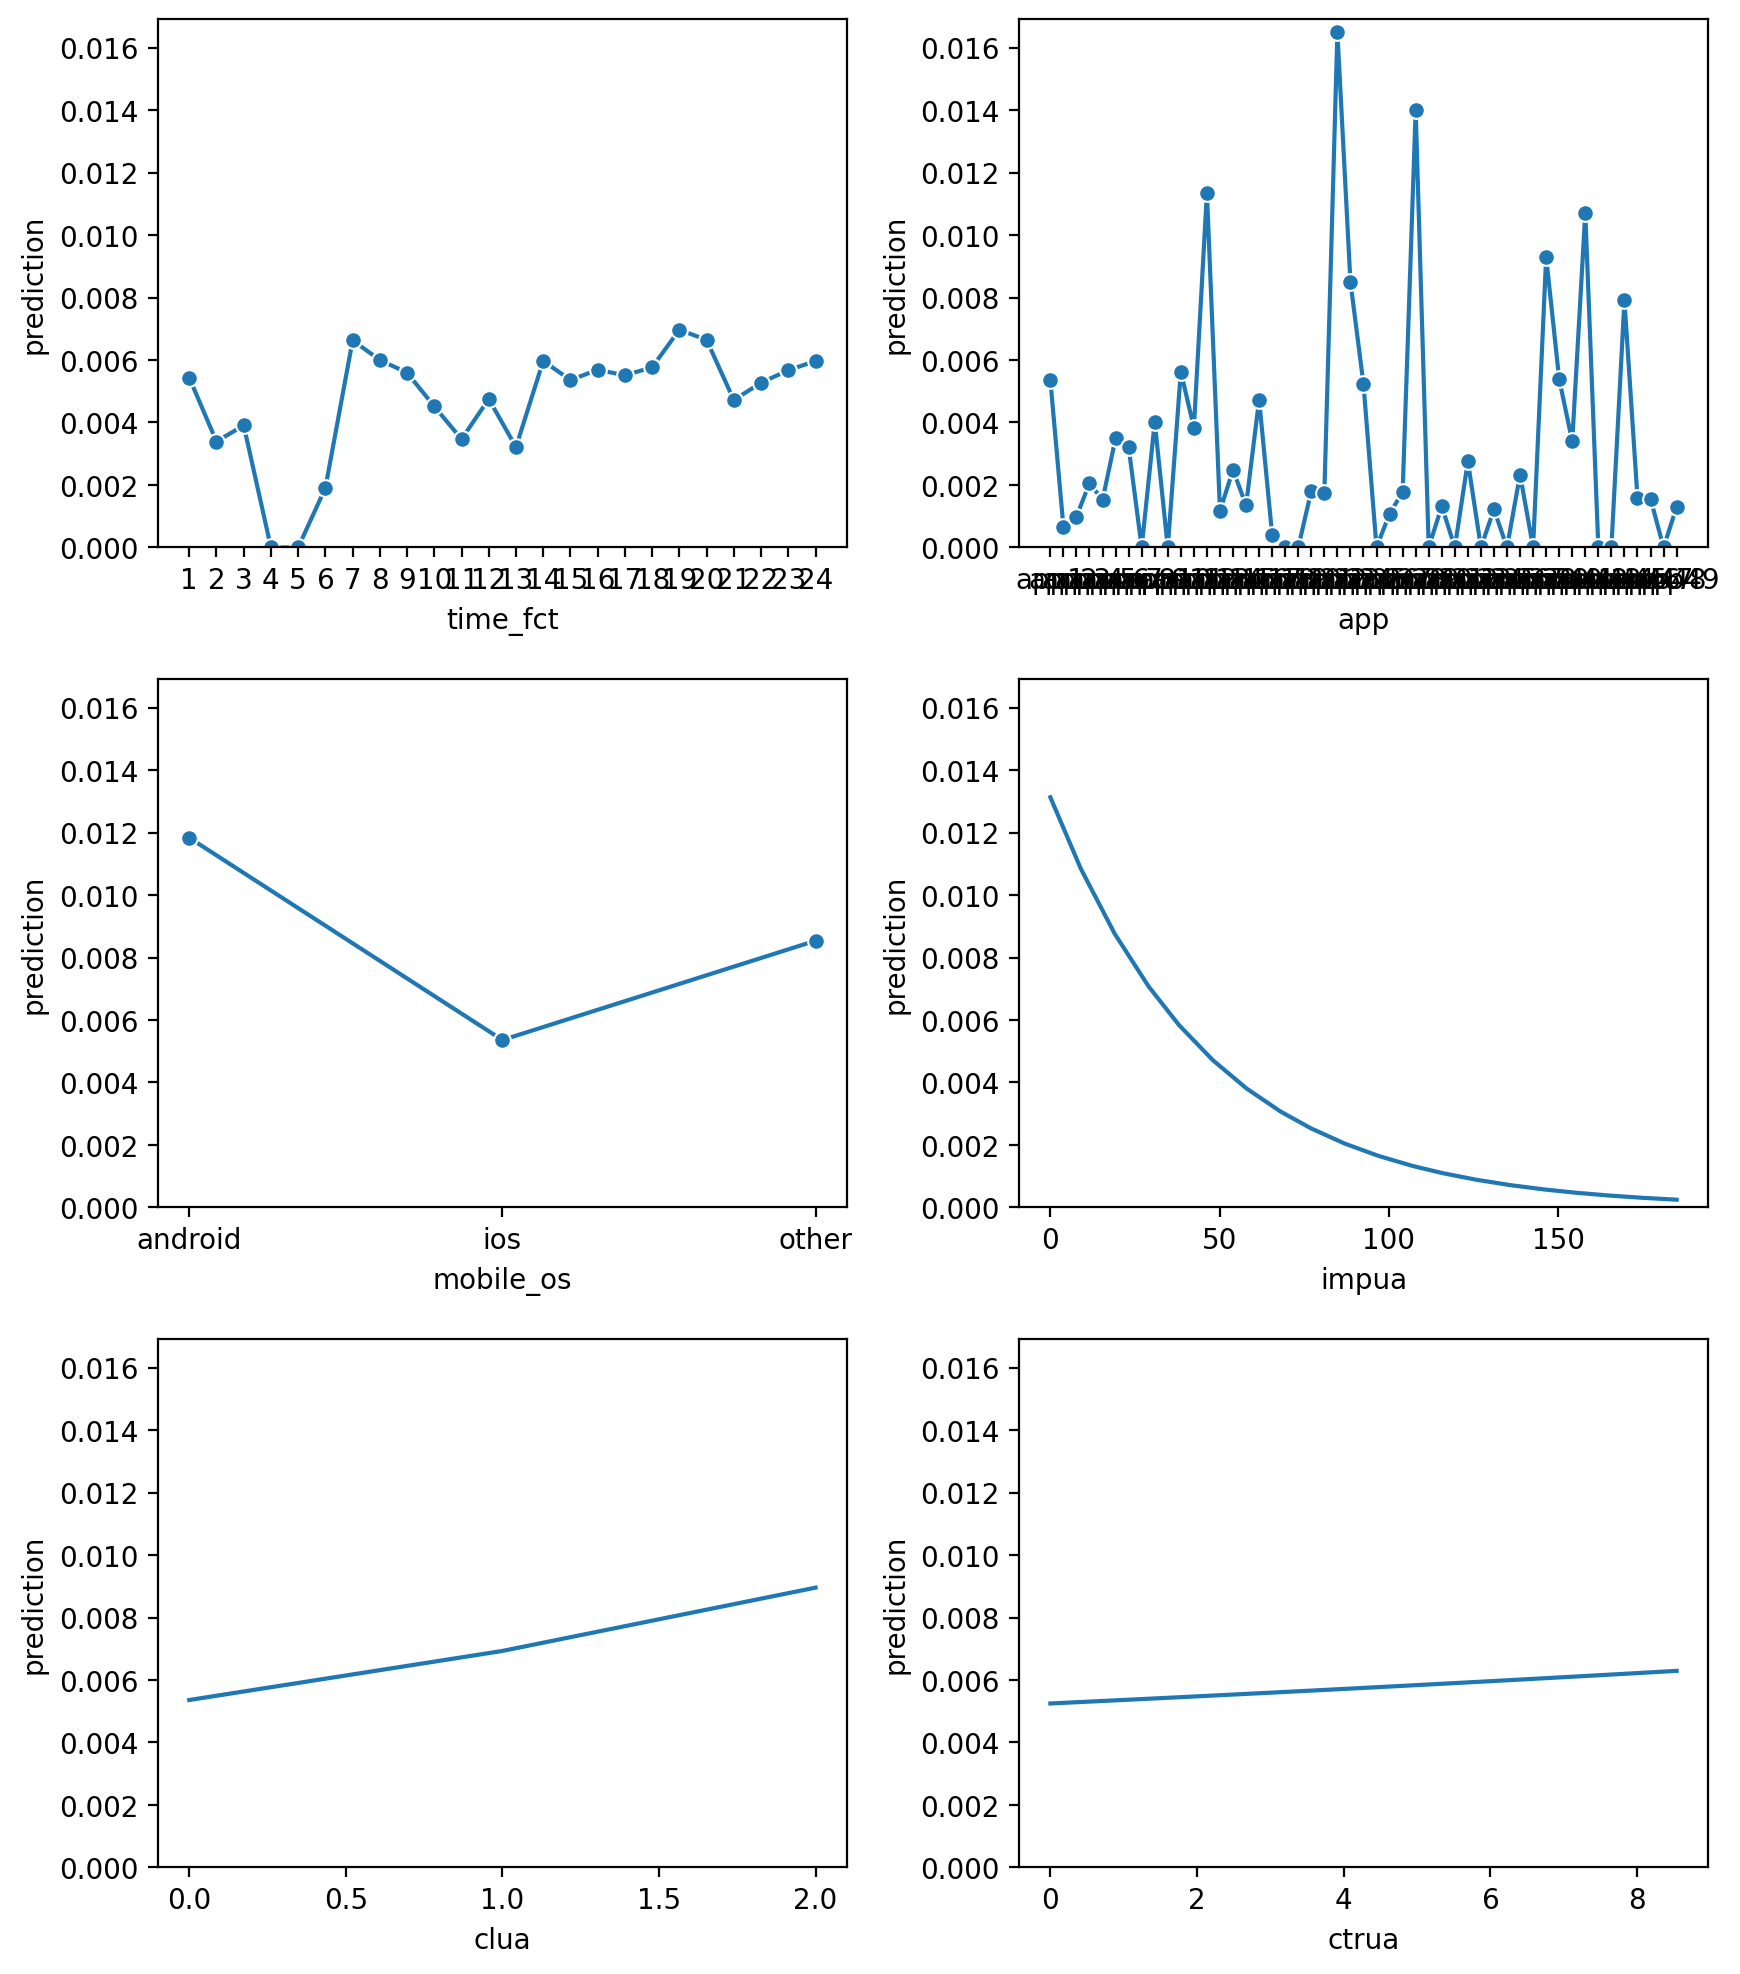

In [10]:
lr.plot('pred')

Full scale pred plots

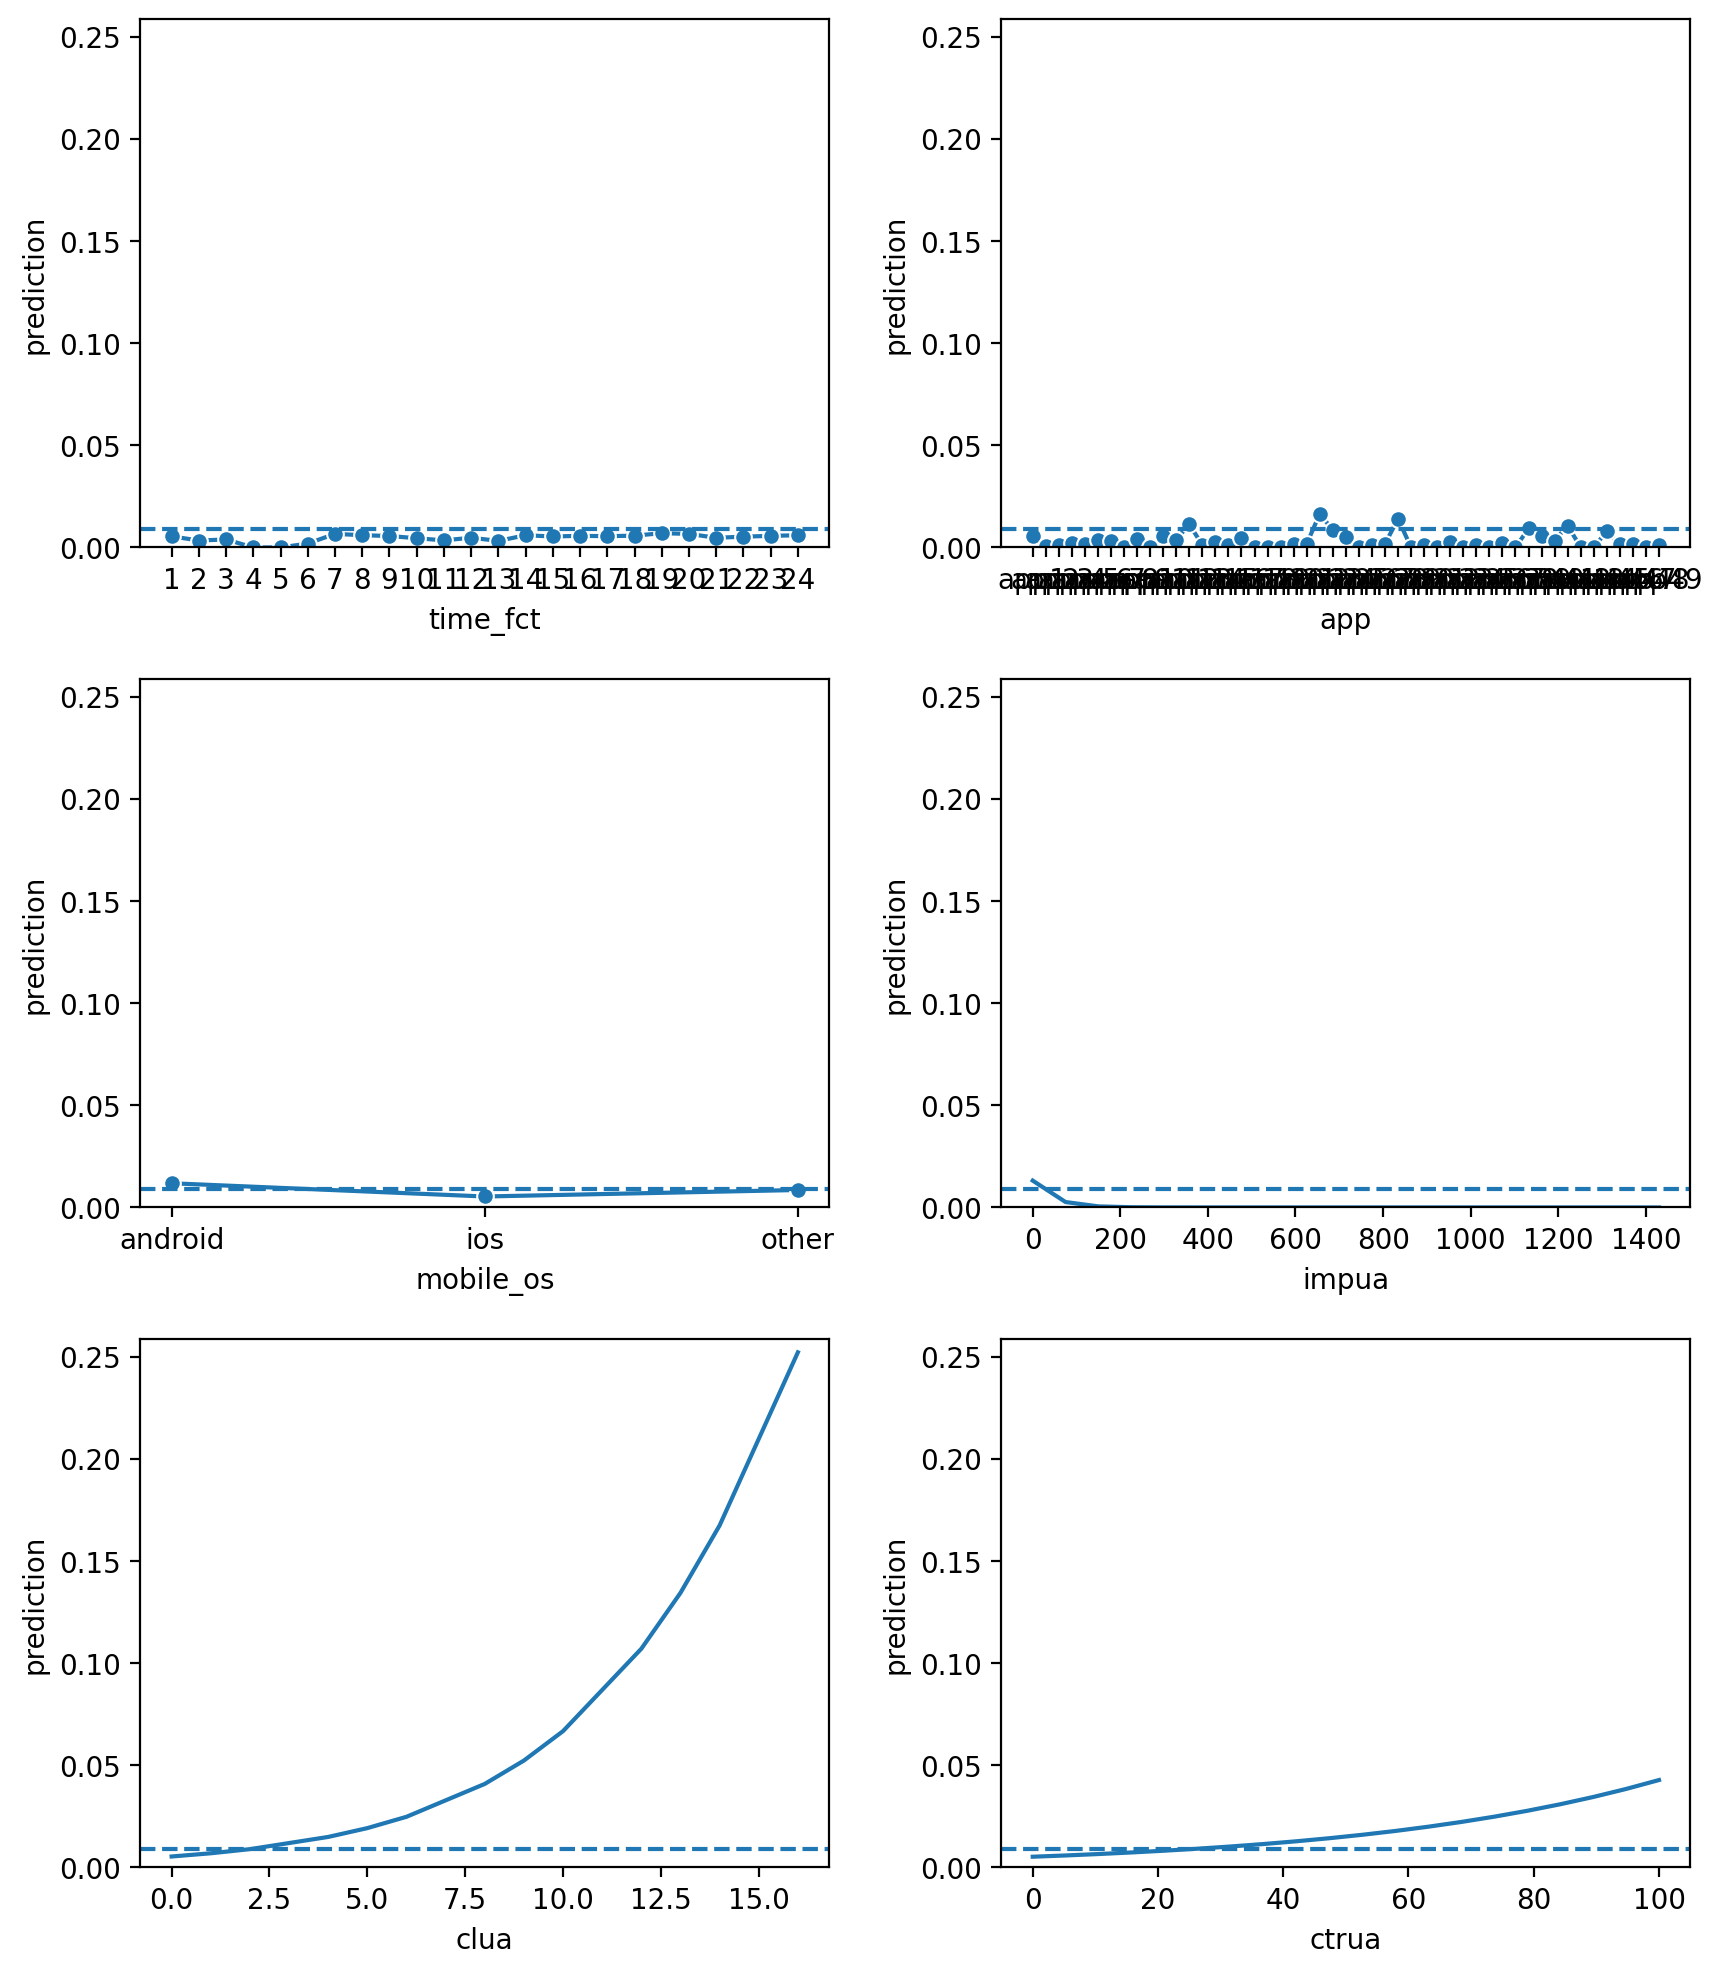

In [11]:
lr.plot('pred',hline=True,minq=0.0,maxq=1.0)

#### Interpreation of prediction plots:

Mobile OS:
-   The model is able to distinguish between the Android, IOS and other OS giving a sense that the model performance is sensitive to changes in OS. Highest probability of clicking on an impression seems to correspond to Android users, with IOS users having the second highest probability of clicking and other OS users with the lowest probability of clicking on an impression. However, we can see that on the full scale (0 to 1) this effect is minimal compared to some of the other metrics although not insignificant

IMPUA (No of past impressions of TZ ad a user has seen across all apps):
-   There seems to be a decreasing trend in this plot: as the IMPUA increases, the probability of clicking on an impression decreases sharply from 0 - 70/80 impressions before flattening out almost to a negligible probability of clicking on an impression at >100 IMPUA mark. This makes sense from a real world perspective as users tend to get annoyed after being repeatedly spammed with the same ad or an ad of the same company

CLUA (Number of past impressions of the TZ ad that the user has clicked on across all apps):
-   There is an increasing trend in this plot. As CLUA increases, the probability of clicking on an impression increases at a steady rate. This suggests that users who have previously clicked on a TZ ad will do so again - the more they have clicked in the past, the more likely they are to do so again. If one observes the full scale plot, we can see that the increase in probability of clicking rises sharply almost exponentially at CLUA >3 

CTRUA (Past CTR (x 100) of the TZ ad by the user across all apps):
-   Similar to CLUA, there is an increasing trend in this plot. As CTRUA increases, the probability of a user clicking on an impression increases as well. Initially this increase is at a steady rate and then turns potentially quadratic at >35/40 CTRUA. 

In summary, as per these plots, mobile_os, IMPUA, CLUA, and CTRUA appear to contribute to change in prediction probability albeit at different scales. CLUA and CTRUA seem to be the more significant as they contribute to noticeable change in prediction probability - there may be an effect of outliers at greater values however. 

#### Permutation Importance Plots

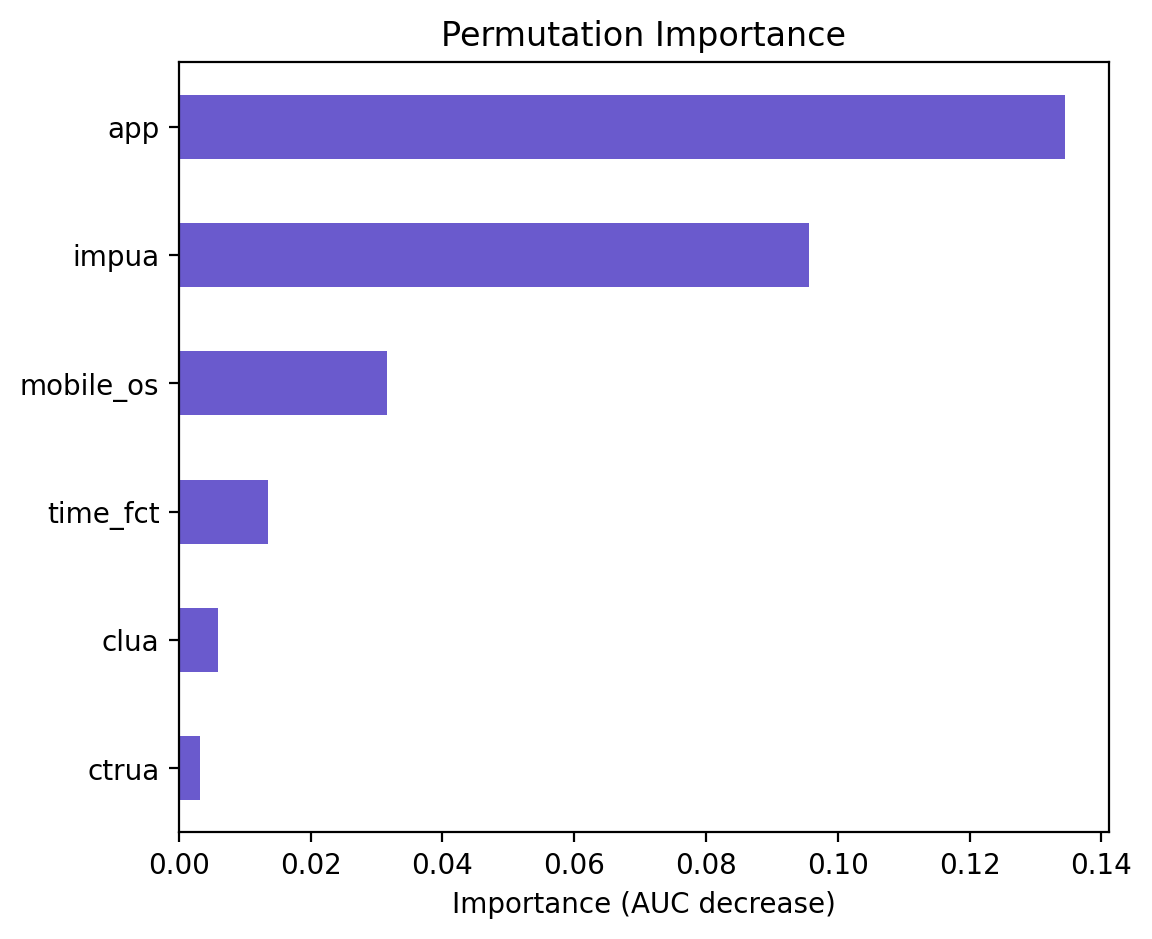

In [12]:
lr.plot('vimp')

#### Interpretation of permutation importance plots:

As per this plot, the app and impua variables seem to be the most important to the model with mobile_os as the third most important but a fair degree lesser than IMPUA. 

In other words, the relationship/patterns that are built connecting IMPUA and app with the click response variable are essential to model performance. 

c. Predict the probability of a click (2 point)

The estimated logistic regression model can predict the probability of a click. Create a new variable `pred_logit` with the predicted click-through probabilities linked to each impression. Make sure to generate predictions for all rows in the training and test data.


In [13]:
tz_gaming["pred_logit"] = lr.predict(data=tz_gaming)['prediction']

# avg prob
np.mean(tz_gaming['pred_logit'])

0.008829781184377872

d. Estimate a logistic regression with `click` as the response variable and `rnd` as the **only** explanatory variable. As before, the model should be estimated on the training sample (i.e., "training == 'train'"). Create a new variable `pred_rnd` with the predicted click-through probabilities (1 point).

In [14]:
lr_rnd = rsm.model.logistic(
    data={'tz gaming':tz_gaming[tz_gaming['training'] == 'train']},
    rvar='click',
    lev='yes',
    evar='rnd'
)
lr_rnd.summary()

Logistic regression (GLM)
Data                 : tz gaming
Response variable    : click
Level                : yes
Explanatory variables: rnd
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.009  -99.1%        -4.72      0.036 -130.657  < .001  ***
rnd        0.965   -3.5%        -0.04      0.036   -0.986   0.324     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.0
Pseudo R-squared (McFadden adjusted): -0.0
Area under the RO Curve (AUC): 0.513
Log-likelihood: -4429.726, AIC: 8863.451, BIC: 8882.211
Chi-squared: 0.972, df(1), p.value 0.324 
Nr obs: 87,535


In [15]:
tz_gaming["pred_rnd"] = lr_rnd.predict(data=tz_gaming)['prediction']

## Part II: Understanding Multicollinearity (10 points)

a. Estimate a logistic regression model with `click` as the response variable and `imppat`, `clpat`, and `ctrpat` as the only explanatory variables. What is the interpretation of the Prediction plots for the explanatory variables? (2 points)

> Note: Make sure to watch the "Video: TZ gaming preview (12 min)" on Canvas before answering this questions so you fully understand what the variables represent

In [16]:
feature_matrix_mc1 = ['imppat','clpat','ctrpat']

lr_mc1 = rsm.model.logistic(
    data={'tz gaming':tz_gaming[tz_gaming['training'] == 'train']},
    rvar='click',
    lev='yes',
    evar=feature_matrix_mc1
)
lr_mc1.summary(vif=True)

Logistic regression (GLM)
Data                 : tz gaming
Response variable    : click
Level                : yes
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.42      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%        -0.00      0.000   -4.802  < .001  ***
clpat      1.002    0.2%         0.00      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%         0.48      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

           vif    Rsq
clpat   26.242  0.962
imppat  23.467  0.957
ct

b. Some of the variables in the dataset are highly correlated with each other. In particular, `imppat` and `clpat` have a strong positive correlation of 0.97. Discuss the implications of this (very) high level of collinearity and also different approaches to deal with it. What are the implications for the model and the interpretation of the Prediction plots? As part of your answer, discuss the change in the Prediction plot for `imppat` when you remove `clpat` from the model you estimated for II.a (4 points).

> Note: Assign your new model without `clpat` to a new object `lr_mc2`. Calculate VIF statistics for each explanatory variable in the model


#### Prediction plots for mc1

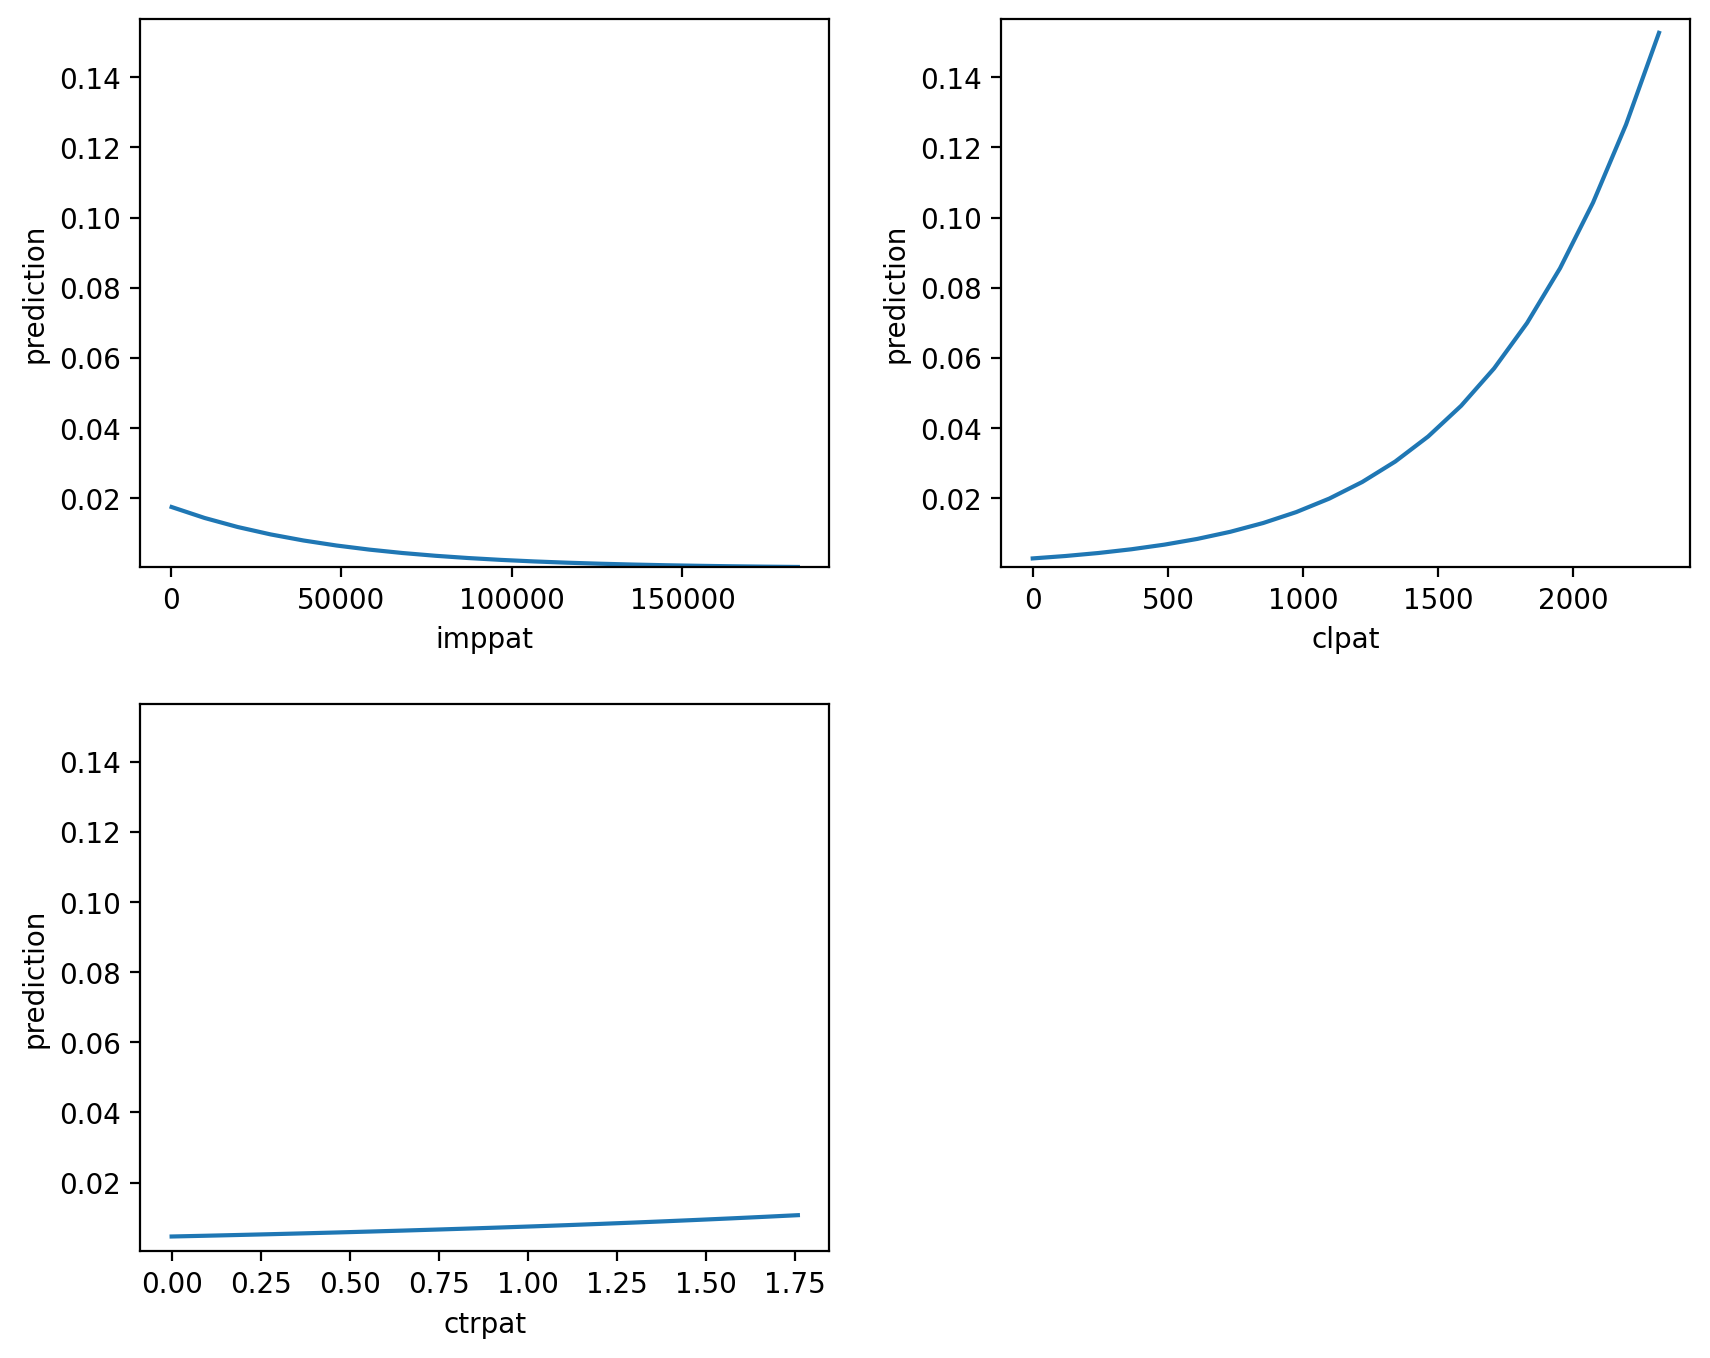

In [17]:
lr_mc1.plot('pred')

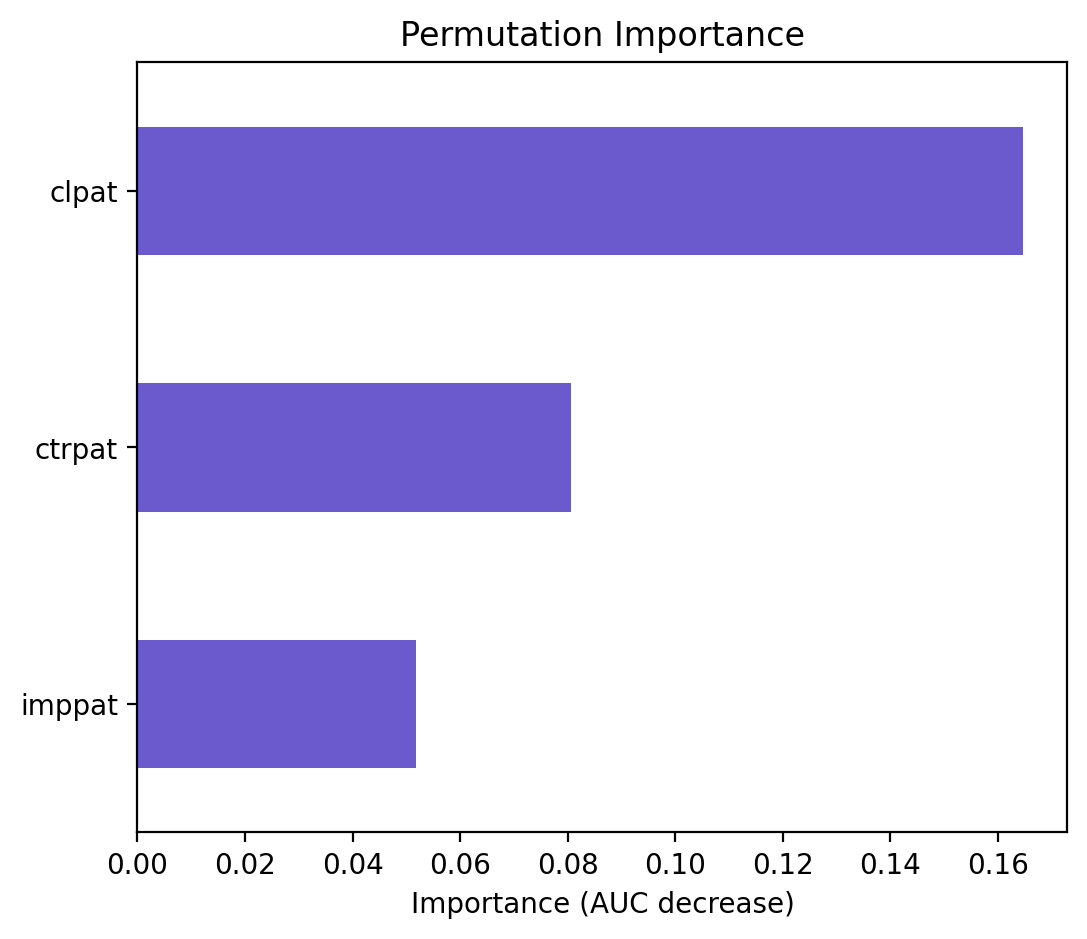

In [18]:
lr_mc1.plot('vimp')

#### Commentary on multicolinearity in lr_mc1:

The two variables imppat and clpat appear to be highly correlated, certainly evident if we observe their VIF scores as part of the model summary both in the high 20s. The way the two metrics are defined, it is expected that the number of impressions seen and the number of clicks would be correlated as someone who sees more impressions will tend to have more number of clicks in absolute terms (the ctr may be low) and so this gives rise to the issue of multicolinearity. This can potentially make the model's coefficients unreliable and also make the prediction plots difficult to interpret since it is not clear whether seeing impressions or clicking on impressions is driving the change in prediction probability of a click. 

With regards to AUC, Multicollinearity does not directly affect the AUC. The AUC measures the model's ability to rank predictions correctly, not the specific coefficients or the significance of predictors.
A model with high multicollinearity can still have a high AUC if it can rank the positive cases higher than the negative cases consistently.
Multicollinearity mainly affects the interpretation of the model coefficients rather than its predictive power. Therefore, a model can still be a good predictive model (high AUC) while suffering from multicollinearity. <br><br>

**** Potential Remedies to address multicolinearity *****:

Removing Variables: Consider removing one or more of the highly correlated variables. In your case, either imppat or clpat could be removed to reduce multicollinearity.

Stepwise regression on Radiant is a useful way to highlight the effect of removing one variable at a time from the feature matrix to highlight which variable is most effective at estimating the regression

Regularization: Techniques like Ridge or Lasso regression can be used. These methods add a penalty to the model for having large coefficients, which can help in dealing with multicollinearity.

Increase Sample Size: Sometimes, increasing the sample size can help in mitigating the effects of multicollinearity.

Combining Variables: Creating new features that are combinations of the highly correlated ones (for example, ratios or differences) can sometimes be effective.

Domain Knowledge: Use domain knowledge to decide which variables are most important and should be retained in the model.

#### Estimating lr_mc2 without CLPAT

In [19]:
feature_matrix_mc2 = ['imppat','ctrpat']

lr_mc2 = rsm.model.logistic(
    data={'tz gaming':tz_gaming[tz_gaming['training'] == 'train']},
    rvar='click',
    lev='yes',
    evar=feature_matrix_mc2
)
lr_mc2.summary(vif=True)

Logistic regression (GLM)
Data                 : tz gaming
Response variable    : click
Level                : yes
Explanatory variables: imppat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.53      0.068  -80.814  < .001  ***
imppat     1.000    0.0%         0.00      0.000    5.460  < .001  ***
ctrpat     1.733   73.3%         0.55      0.030   18.422  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Area under the RO Curve (AUC): 0.674
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 278.619, df(2), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

          vif    Rsq
imppat  1.134  0.118
ctrpat  1.134  0.118


#### Interpretation of lr_mc2:
Given the low VIF scores, there does not seem to be strong evidence of multicolinearity between the number of TZ impresssions shown in the app in a given hour (imppat) and the click through rate for an app in a given hour. This is interesting and we can refer back to our earlier discussion of how clpat and imppat were strongly correlated and I pointed out that ctr might not be influenced/moved by simply showing a large number of ads - the above findings seem to verify my hypothesis. We can potentially infer that past clicks may have a strong correlation with ctrpat as opposed to imppat - Users who in the past have responded favourably to seeing TZ ads and have clicked will potentially exhibit a higher probability of clicking as opposed to those who in the past have not clicked and continue to be bombarded with TZ apps. 


c. Estimate another logistic regression model with `click` as the response variable and `time_fct`, `app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the Prediction plots for `imppat`, `clpat`, and `ctrpat` different compared to the plots from the model you estimated in II.a? Please be specific and investigate beyond simply stating the statistical problem (4 points).


In [20]:
#lr_mc3 = 
feature_matrix_mc3 = ['time_fct','app','imppat','clpat','ctrpat']

lr_mc3 = rsm.model.logistic(
    data={'tz gaming':tz_gaming[tz_gaming['training'] == 'train']},
    rvar='click',
    lev='yes',
    evar=feature_matrix_mc3
)
lr_mc3.summary(vif=True)

Logistic regression (GLM)
Data                 : tz gaming
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                 OR      OR%  coefficient   std.error  z.value p.value     
Intercept     0.012   -98.8%        -4.42       0.284  -15.575  < .001  ***
time_fct[2]   0.588   -41.2%        -0.53       0.323   -1.644     0.1     
time_fct[3]   0.693   -30.7%        -0.37       0.461   -0.795   0.426     
time_fct[4]   0.000  -100.0%       -23.83   43904.903   -0.001     1.0     
time_fct[5]   0.000  -100.0%       -23.86   57249.164   -0.000     1.0     
time_fct[6]   0.359   -64.1%        -1.03       1.027   -0.999   0.318     
time_fct[7]   1.220    22.0%         0.20       0.438    0.453    0.65     
time_fct[8]   1.135    13.5%         0.13       0.309    0.411   0.681     
time_fct[9]   1.063     6.3%         0.06       0.29

High VIF for imppat, clpat, and app: The very high VIF values for imppat (84.451), clpat (80.266), and app (59.079) suggest strong multicollinearity. This indicates that these variables share a significant amount of information, or in other words, they are highly linearly related. Such high multicollinearity can have several implications:

Unstable Coefficients: The coefficients of these variables might be unstable and sensitive to small changes in the model or data. This instability can lead to different coefficient values and prediction patterns compared to models where these variables are less collinear.

Reduced Reliability: It becomes more challenging to interpret the effect of each variable independently. The high degree of shared variance means that the model's ability to isolate the unique contribution of each variable is diminished.

Moderate VIF for ctrpat and time_fct: The VIF for ctrpat (9.033) and time_fct (4.988), though not as high as for the other variables, still indicates a moderate level of multicollinearity. This suggests that these variables also share some variance with other predictors in the model, but to a lesser extent.

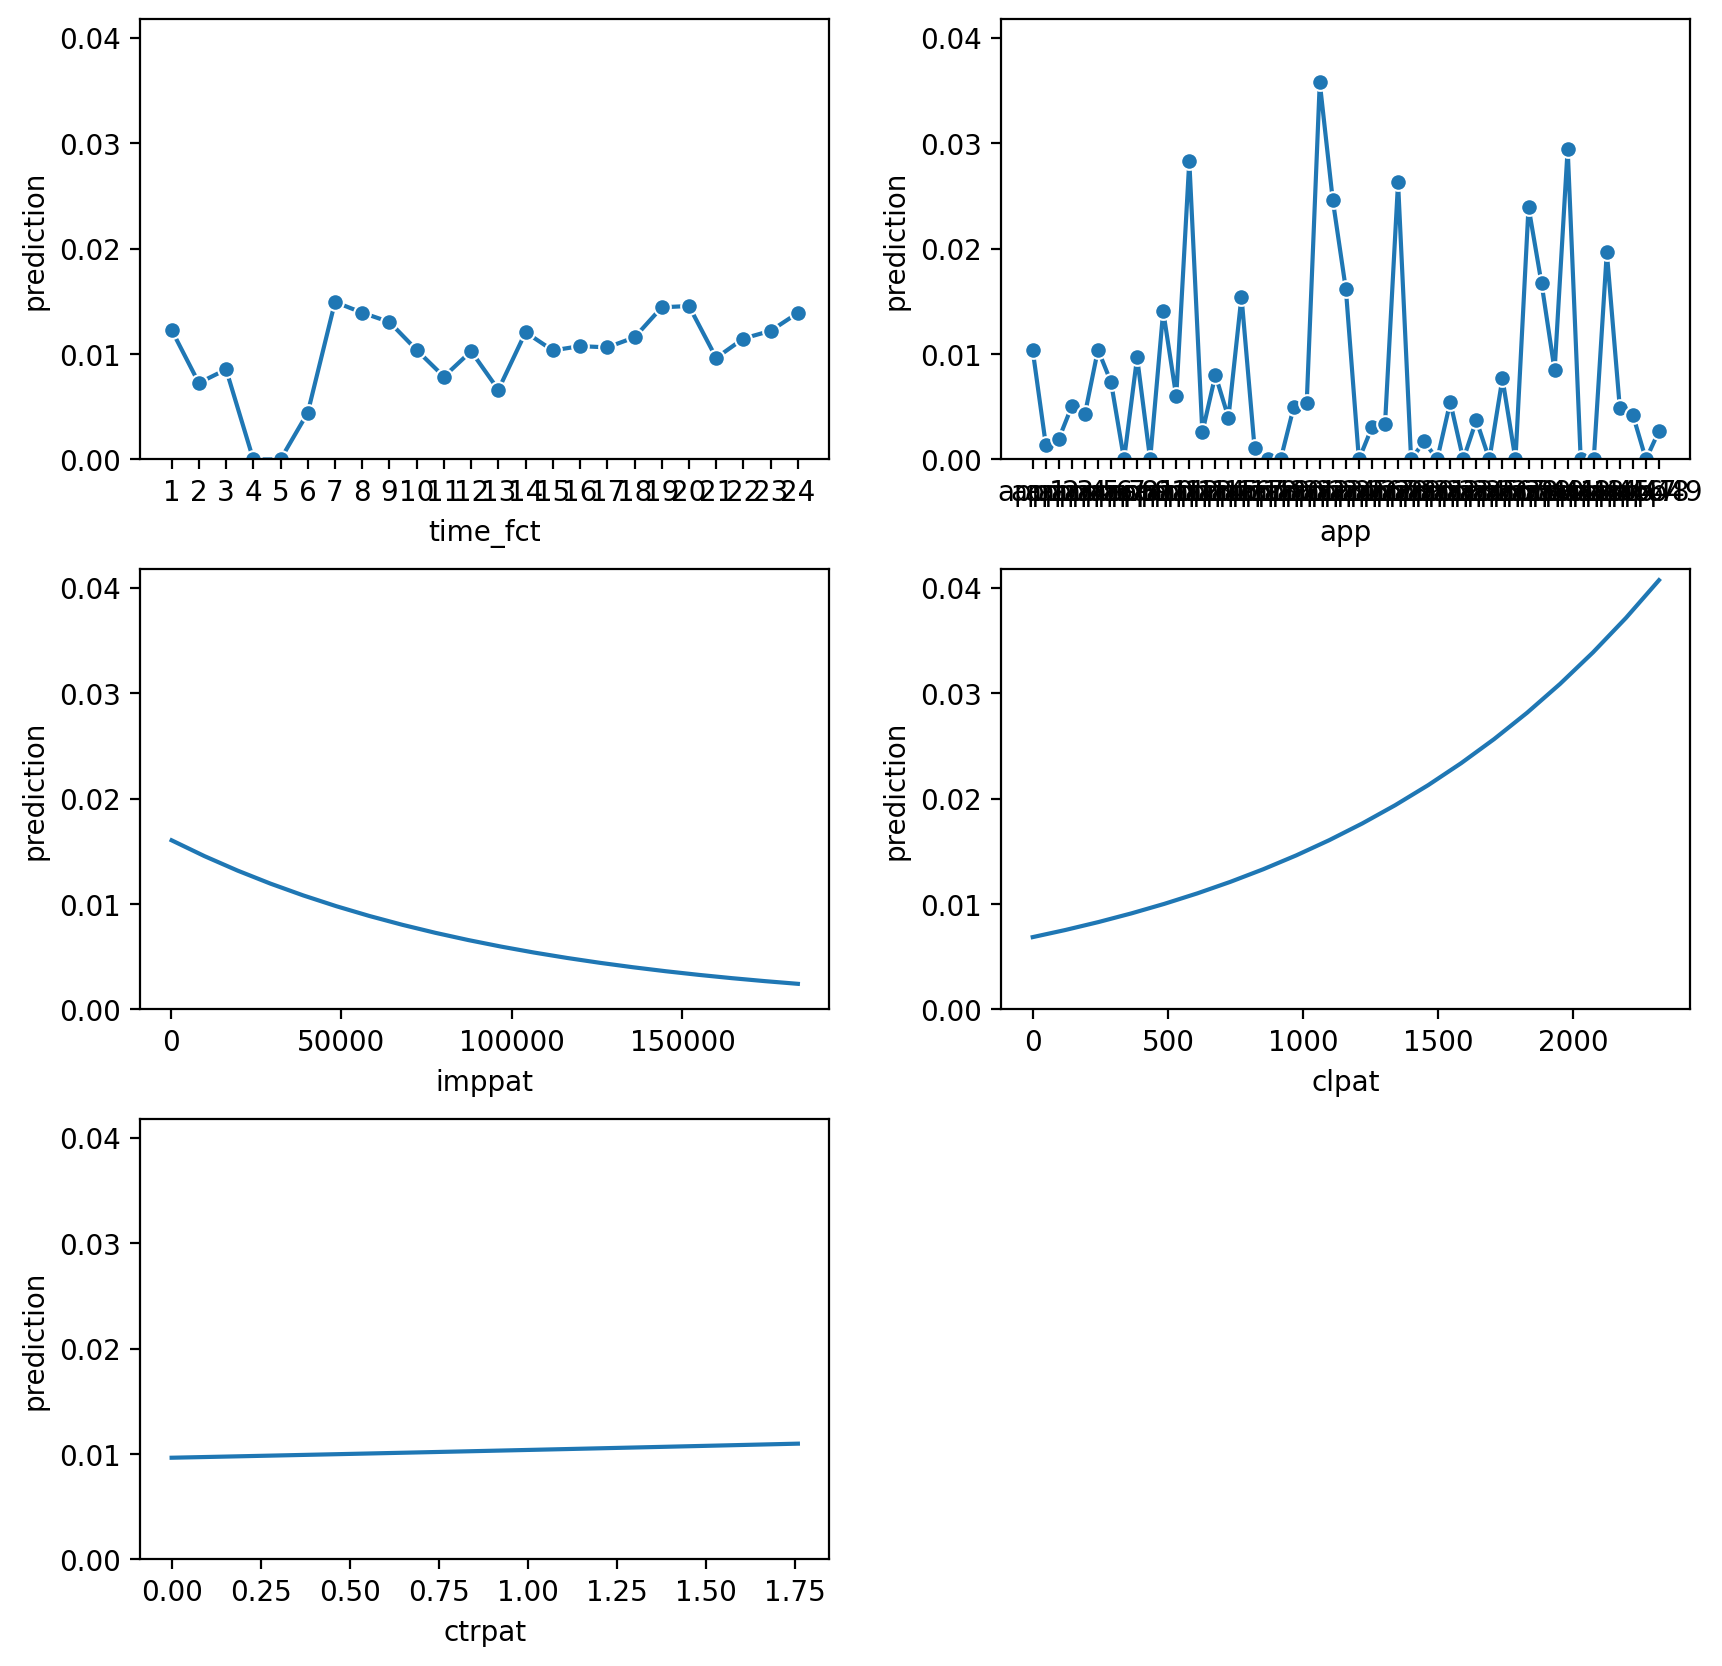

In [21]:
lr_mc3.plot('pred')

Inclusion of Additional Variables: The addition of time_fct and app in the new model introduces more complexity and potentially new information that can affect the relationship between the response variable and the original three variables (imppat, clpat, ctrpat). These new variables might capture some of the variance in the click-through rate that was previously attributed to imppat, clpat, and ctrpat, leading to a change in their coefficients.

Change in Multicollinearity Structure: The addition of new variables can alter the multicollinearity structure of the model. In this case, we can observe that there is a redistribution of the weight/importance among the variables imppat, clpat and ctrpat, affecting the coefficients and potentially leading to different prediction patterns. Both imppat and clpat's VIF has increased 4x (in iib it was around 20 while here it is >80). All three variables have higher y-intercepts compared to ii b. The imppat plot shows a slower decline in prediction probability as imppat increases as compared to iib which is potentially misleading and inflated since multicolinearity has increased in this model

Interaction Effects: The new variables (time_fct and app) might interact with the existing variables (imppat, clpat, and ctrpat) in ways that change the overall model dynamics and is one potential explanation of why multicolinearity has increased. This is one of the reasons why simpler models with fewer variables are preferred as they mitigate effects/possibility of multicolinearity

Implications for Prediction Plots:

The presence of high multicollinearity means that the prediction plots for imppat, clpat, and ctrpat in the model with additional variables (time_fct, app) will likely show different patterns compared to the model where these were the only explanatory variables.
The shared variance between these highly collinear variables and the new variables (time_fct, app) can lead to a redistribution of explanatory power within the model. This can result in changes in the magnitude and even the direction of the coefficients for imppat, clpat, and ctrpat.
The model with additional variables is capturing more complex interactions and shared effects, which can lead to a different understanding of how each individual variable impacts the probability of a click.

## Part III: Decile Analysis of Logistic Regression Results (5 points)

> Note: For the following questions, use only the "test" sample of impressions (i.e., 27,953 rows
where "training == 'test'")

a. Assign each impression to a decile based on the predicted probability of click through (`pred_logit`) based on the model estimated in I.a. Create a new variable `pred_logit_dec` that captures this information. Note: The first decile should have the highest average click-through rate. If not, make sure to "reverse" the decile numbers (i.e., 10 becomes 1, 9 becomes 2, etc.). Use the `xtile` function from the `pyrsm` package to create the deciles (2 points)

In [22]:
# create a variable called 'click_yes' that has value 1 when click == 'yes', has value 0 when click == 'no' and has value np.nan when click.isna() is True
tz_gaming["click_yes"] = np.where(tz_gaming.click == 'yes',1,
                               np.where(tz_gaming.click == 'no',0,np.nan))

tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,click_yes
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,0.0
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,0.0
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,0.0
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,0.0
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,0.0


In [23]:
tz_gaming["pred_logit_dec"] =  (
    tz_gaming
    .groupby('training')
    .pred_logit
    .transform(rsm.xtile,10,rev=True)
)

b. Report the number of impressions, the number of clicks, and the click-through rate for the TZ ad per decile and save this information to a DataFrame. Use the name `dec_tab` for the new data frame (2 points)

In [24]:
# your data frame should have columns called 'nr_impressions', 'nr_clicks', and 'ctr'
# to calculate these values you need deciles, the number of rows (impressions)
# in each decile, the number of clicks in each decile using the `click` variable,
# and the ratio of clicks to impressions (ctr)


dec_tab = (
    tz_gaming[tz_gaming.training == 'test']
    .groupby('pred_logit_dec')
    .agg(
        nr_impressions=('inum', 'count'),
        nr_clicks=('click_yes', 'sum')
    )
    .reset_index()
)

# calculating the click_rate
dec_tab['ctr'] = dec_tab['nr_clicks'] / dec_tab['nr_impressions']

dec_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr
0,1,2796,103.0,0.036838
1,2,2793,48.0,0.017186
2,3,2788,42.0,0.015065
3,4,2796,30.0,0.010730
4,5,2802,15.0,0.005353
5,6,2796,7.0,0.002504
6,7,2794,7.0,0.002505
7,8,2796,3.0,0.001073
8,9,2796,4.0,0.001431
9,10,2796,12.0,0.004292


c. Create a bar chart of click-through rates per decile (i.e., use `pred_logit_dec` as the x-variable and `ctr` as the y-variable). Note that the "click through rate" is not the same as the "predicted probability of click." The click-through rate captures the proportion of impressions in a given group (e.g., in a decile) that actually resulted in a click (1 point)


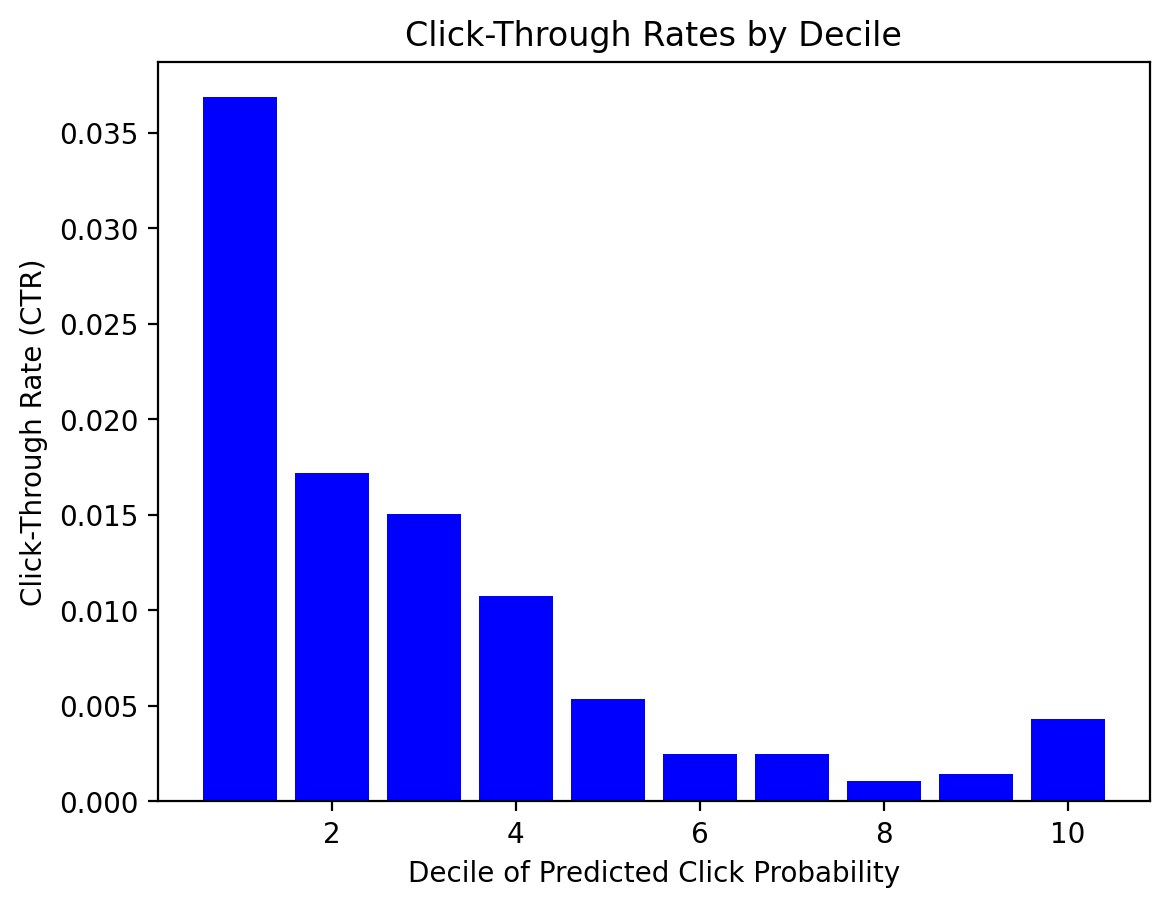

In [25]:
# plt.figure(figsize=(10, 6))
plt.bar(dec_tab['pred_logit_dec'], dec_tab['ctr'], color='blue')

# Adding titles and labels
plt.title('Click-Through Rates by Decile')
plt.xlabel('Decile of Predicted Click Probability')
plt.ylabel('Click-Through Rate (CTR)')

plt.show()


## Part IV: Lift, Gains, and Profit (15 points)

Use the `dec_tab` DataFrame you created in Part III for the following calculations.

a. Write python code to generate a table with the cumulative proportion of impressions and the cumulative gains for each decile (8 points)

> Note: Do NOT use any specialized python packages to construct the gains table. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [26]:
# Assuming 'dec_tab' is your DataFrame with the actual decile data:

# Calculate the total number of impressions and clicks
total_impressions = dec_tab['nr_impressions'].sum()
total_clicks = dec_tab['nr_clicks'].sum()

# Calculate the proportion of impressions and clicks for each decile relative to the total
dec_tab['prop_impressions'] = dec_tab['nr_impressions'] / total_impressions
dec_tab['prop_clicks'] = dec_tab['nr_clicks'] / total_clicks

# Calculate the cumulative sum of these proportions
dec_tab['cum_prop_impressions'] = dec_tab['prop_impressions'].cumsum()
dec_tab['cum_gain_clicks'] = dec_tab['prop_clicks'].cumsum()

# Normalize the final cumulative sums to add up to 1
dec_tab['cum_prop_impressions'] /= dec_tab['cum_prop_impressions'].iloc[-1]
dec_tab['cum_gain_clicks'] /= dec_tab['cum_gain_clicks'].iloc[-1]

# Selecting the relevant columns for the gains table
gains_table = dec_tab[['pred_logit_dec', 'nr_impressions', 'nr_clicks', 'prop_impressions', 'prop_clicks', 'cum_prop_impressions', 'cum_gain_clicks']]

gains_table

,pred_logit_dec,nr_impressions,nr_clicks,prop_impressions,prop_clicks,cum_prop_impressions,cum_gain_clicks
0,1,2796,103.0,0.100025,0.380074,0.100025,0.380074
1,2,2793,48.0,0.099918,0.177122,0.199943,0.557196
2,3,2788,42.0,0.099739,0.154982,0.299682,0.712177
3,4,2796,30.0,0.100025,0.110701,0.399707,0.822878
4,5,2802,15.0,0.100240,0.055351,0.499946,0.878229
5,6,2796,7.0,0.100025,0.025830,0.599971,0.904059
6,7,2794,7.0,0.099953,0.025830,0.699925,0.929889
7,8,2796,3.0,0.100025,0.011070,0.799950,0.940959
8,9,2796,4.0,0.100025,0.014760,0.899975,0.955720
9,10,2796,12.0,0.100025,0.044280,1.000000,1.000000


b. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative gains per decile along with a (diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and cumulative proportion of impressions on the X-axis (7 points)

> Note: Do NOT use any specialized packages to construct the gains chart. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [27]:
zero_row = pd.DataFrame([[0, 0, 0, 0, 0, 0, 0]], 
                        columns=['pred_logit_dec', 'nr_impressions', 'nr_clicks', 'prop_impressions', 'prop_clicks', 'cum_prop_impressions', 'cum_gain_clicks'])

gains_table = pd.concat([zero_row, gains_table]).reset_index(drop=True)
gains_table

,pred_logit_dec,nr_impressions,nr_clicks,prop_impressions,prop_clicks,cum_prop_impressions,cum_gain_clicks
0,0,0,0.0,0.000000,0.000000,0.000000,0.000000
1,1,2796,103.0,0.100025,0.380074,0.100025,0.380074
2,2,2793,48.0,0.099918,0.177122,0.199943,0.557196
3,3,2788,42.0,0.099739,0.154982,0.299682,0.712177
4,4,2796,30.0,0.100025,0.110701,0.399707,0.822878
5,5,2802,15.0,0.100240,0.055351,0.499946,0.878229
6,6,2796,7.0,0.100025,0.025830,0.599971,0.904059
7,7,2794,7.0,0.099953,0.025830,0.699925,0.929889
8,8,2796,3.0,0.100025,0.011070,0.799950,0.940959
9,9,2796,4.0,0.100025,0.014760,0.899975,0.955720


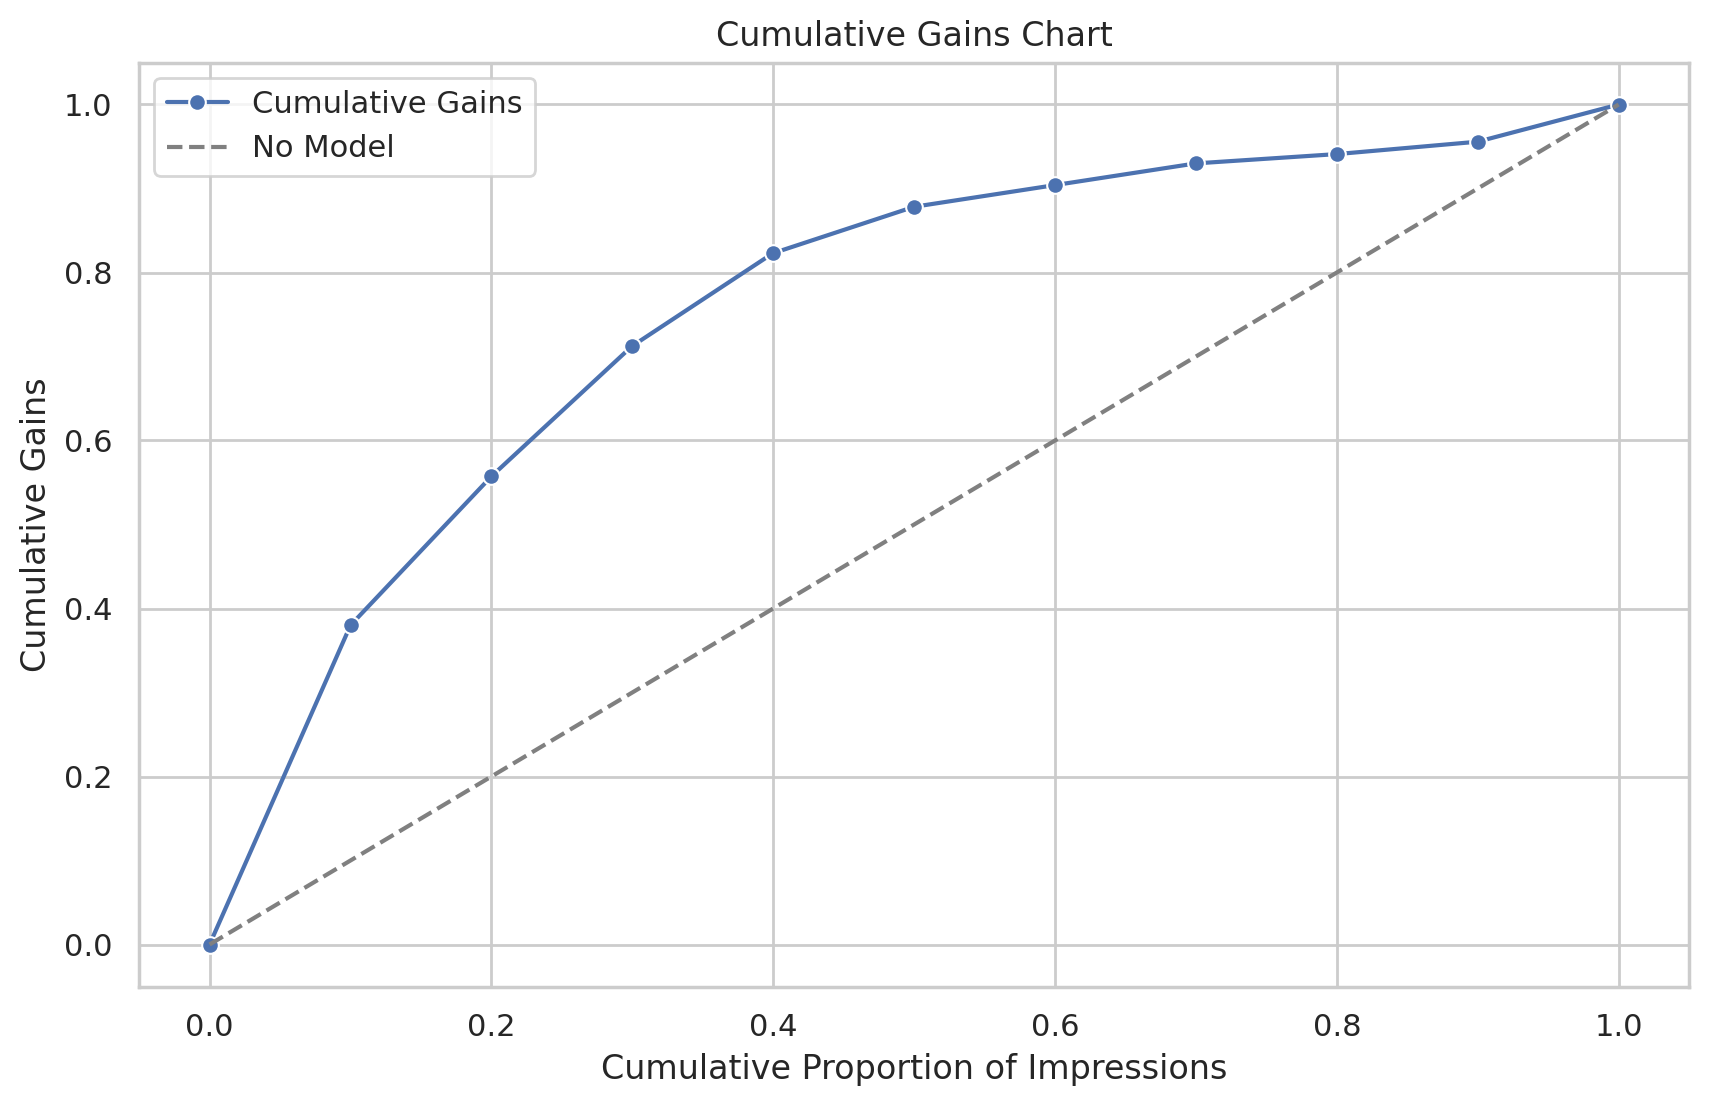

In [28]:
sns.set(style="whitegrid")

# Plotting the cumulative gains curve
plt.figure(figsize=(10, 6))
sns.lineplot(x='cum_prop_impressions', y='cum_gain_clicks', data=gains_table, marker='o', label='Cumulative Gains')

# Plotting the diagonal line to represent the "no model" scenario
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='No Model')

# Adding labels and title
plt.xlabel('Cumulative Proportion of Impressions')
plt.ylabel('Cumulative Gains')
plt.title('Cumulative Gains Chart')
plt.legend()

# Show the plot
plt.show()

## Part V: Confusion matrix (10 points)

a. Create a "confusion matrix" based on the predictions from the logistic regression model you estimated in Part I.a (i.e., the model used to generate `pred_logit`). Again, use **only** data from the test set here (i.e., "training == 'test'"). Use the financial assumptions mentioned above, and repeated in section VI below, to determine an appropriate cut-off (i.e., breakeven). Calculate "accuracy" based on the confusion matrix you created (2 points)

> Note: Do NOT use any specialized packages to construct the confusion matrix. Code the matrix from scratch.  Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

> Note use the code format below to store the relevant values from your confusion matrix

In [29]:
cost_per_impression = 10 / 1000  # $10 CPM means $0.01 per impression
conversion_rate = 0.05  # 5% conversion rate to sign up after clicking
clv = 25  # Expected Customer Lifetime Value
breakeven_cpc = cost_per_impression / (conversion_rate * clv)  # Breakeven Cost Per Click
breakeven_cpc

0.008

In [30]:
test_data = tz_gaming[tz_gaming['training'] == 'test']

# Predict probabilities using the model for the test set
y_test_proba = lr.predict(data=test_data)['prediction']

# Convert 'click' to binary for the actual outcomes
y_test = test_data['click'].apply(lambda x: 1 if x == 'yes' else 0)

In [31]:
# Applying the breakeven point to make predictions on the test set
y_pred = (y_test_proba >= breakeven_cpc).astype(int)

# Confusion matrix values
TP = ((y_pred == 1) & (y_test == 1)).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
TN = ((y_pred == 0) & (y_test == 0)).sum()
FN = ((y_pred == 0) & (y_test == 1)).sum()

# Accuracy calculation
accuracy = (TP + TN) / (TP + FP + TN + FN)

In [32]:
# Creating the confusion matrix dataframe
cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)

cm_logit, accuracy, breakeven_cpc

(  label     nr
 0    TP    221
 1    FP  10661
 2    TN  17021
 3    FN     50,
 0.6168210925482059,
 0.008)

In [33]:
accuracy_logit = accuracy

b. Calculate a DataFrame with elements from a confusion matrix based on `pred_rnd` created in Part I and calculate `accuracy` based on the confusion matrix you created (2 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [34]:
# Define the cut-off for classification based on financial breakeven (or 0.5 if not specified)

# Filter out the test set
test_data = tz_gaming[tz_gaming['training'] == 'test']

# Actual outcomes
y_test = test_data['click'].apply(lambda x: 1 if x == 'yes' else 0)

# Predicted classifications based on the cut-off
y_pred_rnd = (test_data['pred_rnd'] >= breakeven_cpc).astype(int)

# Confusion matrix values
TP_rnd = ((y_pred_rnd == 1) & (y_test == 1)).sum()
FP_rnd = ((y_pred_rnd == 1) & (y_test == 0)).sum()
TN_rnd = ((y_pred_rnd == 0) & (y_test == 0)).sum()
FN_rnd = ((y_pred_rnd == 0) & (y_test == 1)).sum()

# Accuracy calculation
accuracy_rnd = (TP_rnd + TN_rnd) / (TP_rnd + FP_rnd + TN_rnd + FN_rnd)

# Creating the confusion matrix dataframe
cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP_rnd, FP_rnd, TN_rnd, FN_rnd]
    }
)

# Display the confusion matrix and accuracy
cm_rnd, accuracy_rnd

(  label     nr
 0    TP    271
 1    FP  27606
 2    TN     76
 3    FN      0,
 0.012413694415626229)

In [35]:
accuracy_rnd

0.012413694415626229

c. Discuss the similarities and differences between the two confusion matrices. Which prediction (model) is best, based on the confusion matrix? Provide support for your conclusions (3 points)

Individual review of models based on confusion matrix:

The logit model seems to have a relatively high number of True Negatives and a low number of False Negatives, which implies it is good at identifying users who will not click on the ad and doesn't miss many of the clickers. However, it has a high number of False Positives, which could lead to wasted resources (waste of impressions and waste of money ) if used for targeted marketing, as many users who are predicted to click on the ad actually will not.

RND model has a higher number of True Positives and no False Negatives; however, it has an extremely high number of False Positives, even more than logit, and an extremely low number of True Negatives. This model predicts almost everyone will click on the ad (a bit like spamming) which is why it has no False Negatives. However, this approach is highly inefficient, as it would target nearly everyone, wasting resources and potentially annoying users with unwanted ads.

Conclusion:
In the context of targeted marketing, where resources are allocated for users predicted to click on an ad, having a high number of False Positives as in the RND model can be very costly and thus is undesirable. The logit model's higher accuracy means it is correct more often when predicting whether a user will click on an ad or not and seems more financially beneficial to use.

While accuracy is a good starting point for model comparison, it is not the only metric that should be considered, especially in imbalanced datasets where the number of negatives vastly outnumbers the positives (or vice versa). Other metrics such as precision, recall, AUC-ROC curves may offer better and more balanced insights. 

d. Recalculate the confusion matrices from V.a and V.b using 0.5 as the cutoff. Based on these new matrices, again discuss the similarities and differences. Which model is best based on these new confusion matrices? Provide support for your conclusions (3 points)

> Note use the code format below to store the relevant values from your confusion matrix

#### Recomputing logit confusion matrix using 0.5 as the cutoff

In [36]:
# Applying the breakeven point to make predictions on the test set
breakeven_cpc_recalc = 0.5

y_pred = (y_test_proba >= breakeven_cpc_recalc).astype(int)

# Confusion matrix values
TP = ((y_pred == 1) & (y_test == 1)).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
TN = ((y_pred == 0) & (y_test == 0)).sum()
FN = ((y_pred == 0) & (y_test == 1)).sum()

# Accuracy calculation
accuracy_logit_recalc = (TP + TN) / (TP + FP + TN + FN)

In [37]:
cm_logit_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)

cm_logit_recalc, accuracy_logit_recalc, breakeven_cpc_recalc


(  label     nr
 0    TP      0
 1    FP      0
 2    TN  27682
 3    FN    271,
 0.9903051550817443,
 0.5)

In [38]:
accuracy_logit_recalc

0.9903051550817443

#### Recomputing rnd confusion matrix using 0.5 as the cutoff

In [39]:
# Predicted classifications based on the cut-off
breakeven_rnd_recalc = 0.5
y_pred_rnd = (test_data['pred_rnd'] >= breakeven_rnd_recalc).astype(int)

# Confusion matrix values
TP_rnd = ((y_pred_rnd == 1) & (y_test == 1)).sum()
FP_rnd = ((y_pred_rnd == 1) & (y_test == 0)).sum()
TN_rnd = ((y_pred_rnd == 0) & (y_test == 0)).sum()
FN_rnd = ((y_pred_rnd == 0) & (y_test == 1)).sum()

# Accuracy calculation
accuracy_rnd_recalc = (TP_rnd + TN_rnd) / (TP_rnd + FP_rnd + TN_rnd + FN_rnd)

# Creating the confusion matrix dataframe
cm_rnd_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP_rnd, FP_rnd, TN_rnd, FN_rnd]
    }
)

# Display the confusion matrix and accuracy
cm_rnd_recalc, accuracy_rnd_recalc

(  label     nr
 0    TP      0
 1    FP      0
 2    TN  27682
 3    FN    271,
 0.9903051550817443)

> Note use the code format below to store the relevant values from your confusion matrix

In [40]:
accuracy_rnd_recalc

0.9903051550817443

Thoughts on logit_recalc and rnd_recalc:

Despite the high accuracy of approximately 99.03%, both models fail to identify any user who clicked on the ad. This is indicative of a significant issue with the models' ability to detect the positive class, which is crucial for TZ gaming. The identical high accuracy figures are misleading due to the significant class imbalance in the dataset. With the vast majority of users not clicking on ads, a model that predicts no users will click will still achieve high accuracy, even though it's not useful for our use case. 

Both models having such a high number of False Negatives (FN) and no TPs means a loss of potential engagements with customers. In the context of TZ gaming, this is equivalent to missing out on all opportunities to interact with interested users, which could result in a significant loss of revenue.

In conclusion, both models are garbage. This leads to an interesting point: setting the breakeven cutoff at 0.5 is not the best strategy even though it is a widely used benchmark in data science. 

## Part VI: Model comparison (12 points)


Use the following cost information to assess the profitability each of these models for targeting purposes during the upcoming advertising campaign where TZ will purchase 20-million impressions from Vneta:

* Cost per 1,000 video impressions (CPM) is $10
* Conversion to sign-up as a TZ game player after clicking on an ad is 5%
* The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
* The total cost of the data from Vneta is $50K
* The total cost charged for the data science consulting services by Vneta is $150K

Use `pred_logit`, `pred_rnd`, and the predictions from Vneta based on their proprietary model `pred_vneta` to compare model performance.

> Note: The currently available data (+ the `pred_vneta` prediction) are free as part of the partnership between Vneta and TZ-gaming

a. Create a new variable `target_logit` that is `True` if the predicted click-through (`pred_logit`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [41]:
tz_gaming["target_logit"] = tz_gaming['pred_logit'] > breakeven_cpc
tz_gaming['target_logit']

0         False
1          True
2         False
3          True
4         False
          ...  
115483    False
115484    False
115485     True
115486     True
115487     True
Name: target_logit, Length: 115488, dtype: bool

b. Create a new variable `target_rnd` that is `True` if the predicted click-through (`pred_rnd`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [42]:
tz_gaming["target_rnd"] = tz_gaming['pred_rnd'] > breakeven_cpc
tz_gaming['target_rnd']

0         True
1         True
2         True
3         True
4         True
          ... 
115483    True
115484    True
115485    True
115486    True
115487    True
Name: target_rnd, Length: 115488, dtype: bool

c. Create a new variable `target_vneta` that is `True` if the predicted click-through (`pred_vneta`) probability is greater than the break-even response rate and `False` otherwise (1 point)

In [43]:
# insert your answer here
tz_gaming["target_vneta"] = tz_gaming['pred_vneta'] > breakeven_cpc

In [44]:
tz_gaming['target_vneta'].shape[0]

115488

In [45]:
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

In [46]:
tz_gaming.columns

Index(['training', 'inum', 'click', 'time', 'time_fct', 'app', 'mobile_os',
       'impup', 'clup', 'ctrup', 'impua', 'clua', 'ctrua', 'imput', 'clut',
       'ctrut', 'imppat', 'clpat', 'ctrpat', 'rnd', 'pred_vneta', 'id',
       'pred_logit', 'pred_rnd', 'click_yes', 'pred_logit_dec', 'target_logit',
       'target_rnd', 'target_vneta', 'pred_spam', 'target_spam'],
      dtype='object')

d. Based only on the test set (i.e, `training == "test"`), calculate the expected profit (in dollars) and the expected return on marketing expenditures (ROME) if TZ (1) `spams` everyone in the test set, (2) continues to target using their current approach (`pred_rnd`), (3) purchases the data from Vneta and uses the logistic regression from I (`pred_logit`) for targeting, or (4) used Vneta's data science consulting services (`pred_vneta`) (3 points)

> Note: For efficiency, you can adapt the `perf_calc_actual` function you created for the Tuango case to do the relevant performance calculations for the different models

#### Setting up a modular approach to computing profit and ROME -- I will set up a test dataframe containing training == test and use data from that df to do my calculations

In [47]:
# creating a test set
tz_gaming_test = tz_gaming[tz_gaming['training'] == 'test'].copy()
tz_gaming_test.shape

(27953, 31)

In [48]:
tz_gaming_test.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,id,pred_logit,pred_rnd,click_yes,pred_logit_dec,target_logit,target_rnd,target_vneta,pred_spam,target_spam
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,id466983,1.020981e-02,0.008791,0.0,4,True,True,False,1,True
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,id946375,8.665095e-03,0.008718,0.0,4,True,True,True,1,True
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,id479295,1.910723e-14,0.008448,0.0,10,False,True,False,1,True
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,id83284,6.240407e-03,0.008630,0.0,5,False,True,False,1,True
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,id359434,1.233449e-02,0.009086,0.0,3,True,True,True,1,True


In [49]:
tz_gaming_test[tz_gaming_test['target_spam']]

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,id,pred_logit,pred_rnd,click_yes,pred_logit_dec,target_logit,target_rnd,target_vneta,pred_spam,target_spam
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,id466983,1.020981e-02,0.008791,0.0,4,True,True,False,1,True
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,id946375,8.665095e-03,0.008718,0.0,4,True,True,True,1,True
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,id479295,1.910723e-14,0.008448,0.0,10,False,True,False,1,True
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,id83284,6.240407e-03,0.008630,0.0,5,False,True,False,1,True
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,id359434,1.233449e-02,0.009086,0.0,3,True,True,True,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,id847352,1.093091e-03,0.009435,0.0,8,False,True,False,1,True
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,id457437,3.609483e-03,0.008930,0.0,6,False,True,False,1,True
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,id792352,2.052670e-02,0.008806,0.0,2,True,True,False,1,True
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,id115678,2.192207e-02,0.008896,0.0,1,True,True,True,1,True


In [50]:
# given data
cost_per_impression = 10 / 1000  
conversion_rate = 0.05  
clv = 25

In [51]:
# setting up the function to compute the profit and ROME
def calc_profit_rome(model,df,target_col,cost_per_impression,conversion_rate,clv):
    
    target_df = df[df[target_col]]
    
    nr_impression = target_df.shape[0] #no of impressions sent out in this approach
    response_rate = target_df['click_yes'].mean()# Calculate the response rate i.e. mean of responses
    nr_responses = target_df['click_yes'].sum() # actual recorded clicks
    revenue = clv * nr_responses * conversion_rate
    cost = cost_per_impression * nr_impression
    profit = revenue - cost
    ROME = profit/cost
    
    metrics_info = f"""
    Performance metrics of the {model}: \n
    Number of Impressions: {nr_impression:,.0f}
    Number of clicks: {nr_responses:,.0f}
    Response Rate: {100 * response_rate:.2f}%
    Total expected Revenue: ${revenue:,.2f}
    Total expected Cost: ${cost:,.2f}
    Net Profit: ${profit:,.2f}
    Return on Marketing Expenditure (ROME) for {model} is: {ROME:.2f}
    """

    print(metrics_info)
    return profit, ROME

In [52]:
profit_spam,ROME_spam = calc_profit_rome("spam model",tz_gaming_test, 'target_spam',cost_per_impression,conversion_rate,clv)


    Performance metrics of the spam model: 

    Number of Impressions: 27,953
    Number of clicks: 271
    Response Rate: 0.97%
    Total expected Revenue: $338.75
    Total expected Cost: $279.53
    Net Profit: $59.22
    Return on Marketing Expenditure (ROME) for spam model is: 0.21
    


In [53]:
profit_rnd,ROME_rnd = calc_profit_rome("rnd model",tz_gaming_test, 'target_rnd', cost_per_impression,conversion_rate,clv)


    Performance metrics of the rnd model: 

    Number of Impressions: 27,877
    Number of clicks: 271
    Response Rate: 0.97%
    Total expected Revenue: $338.75
    Total expected Cost: $278.77
    Net Profit: $59.98
    Return on Marketing Expenditure (ROME) for rnd model is: 0.22
    


In [54]:
profit_logit,ROME_logit = calc_profit_rome("logit model",tz_gaming_test, 'target_logit', cost_per_impression,conversion_rate,clv)


    Performance metrics of the logit model: 

    Number of Impressions: 10,882
    Number of clicks: 221
    Response Rate: 2.03%
    Total expected Revenue: $276.25
    Total expected Cost: $108.82
    Net Profit: $167.43
    Return on Marketing Expenditure (ROME) for logit model is: 1.54
    


In [55]:
profit_vneta,ROME_vneta = calc_profit_rome("Vneta Consultancy service", tz_gaming_test, 'target_vneta', cost_per_impression,conversion_rate,clv)


    Performance metrics of the Vneta Consultancy service: 

    Number of Impressions: 4,871
    Number of clicks: 160
    Response Rate: 3.28%
    Total expected Revenue: $200.00
    Total expected Cost: $48.71
    Net Profit: $151.29
    Return on Marketing Expenditure (ROME) for Vneta Consultancy service is: 3.11
    


#### Making a df to capture all these results

In [56]:
mod_perf = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit, profit_rnd, profit_vneta, profit_spam],
        "ROME": [ROME_logit, ROME_rnd, ROME_vneta, ROME_spam]
    }
)
print(mod_perf)

   model  profit      ROME
0  logit  167.43  1.538596
1    rnd   59.98  0.215159
2  vneta  151.29  3.105933
3   spam   59.22  0.211856


In [58]:
# Sort the DataFrame by 'Profit' and 'ROME' in descending order
sorted_by_profit = mod_perf.sort_values(by='profit', ascending=False)
sorted_by_ROME = mod_perf.sort_values(by='ROME', ascending=False)

#### Plotting Profit and ROME for 6D

<Figure size 2800x1400 with 0 Axes>

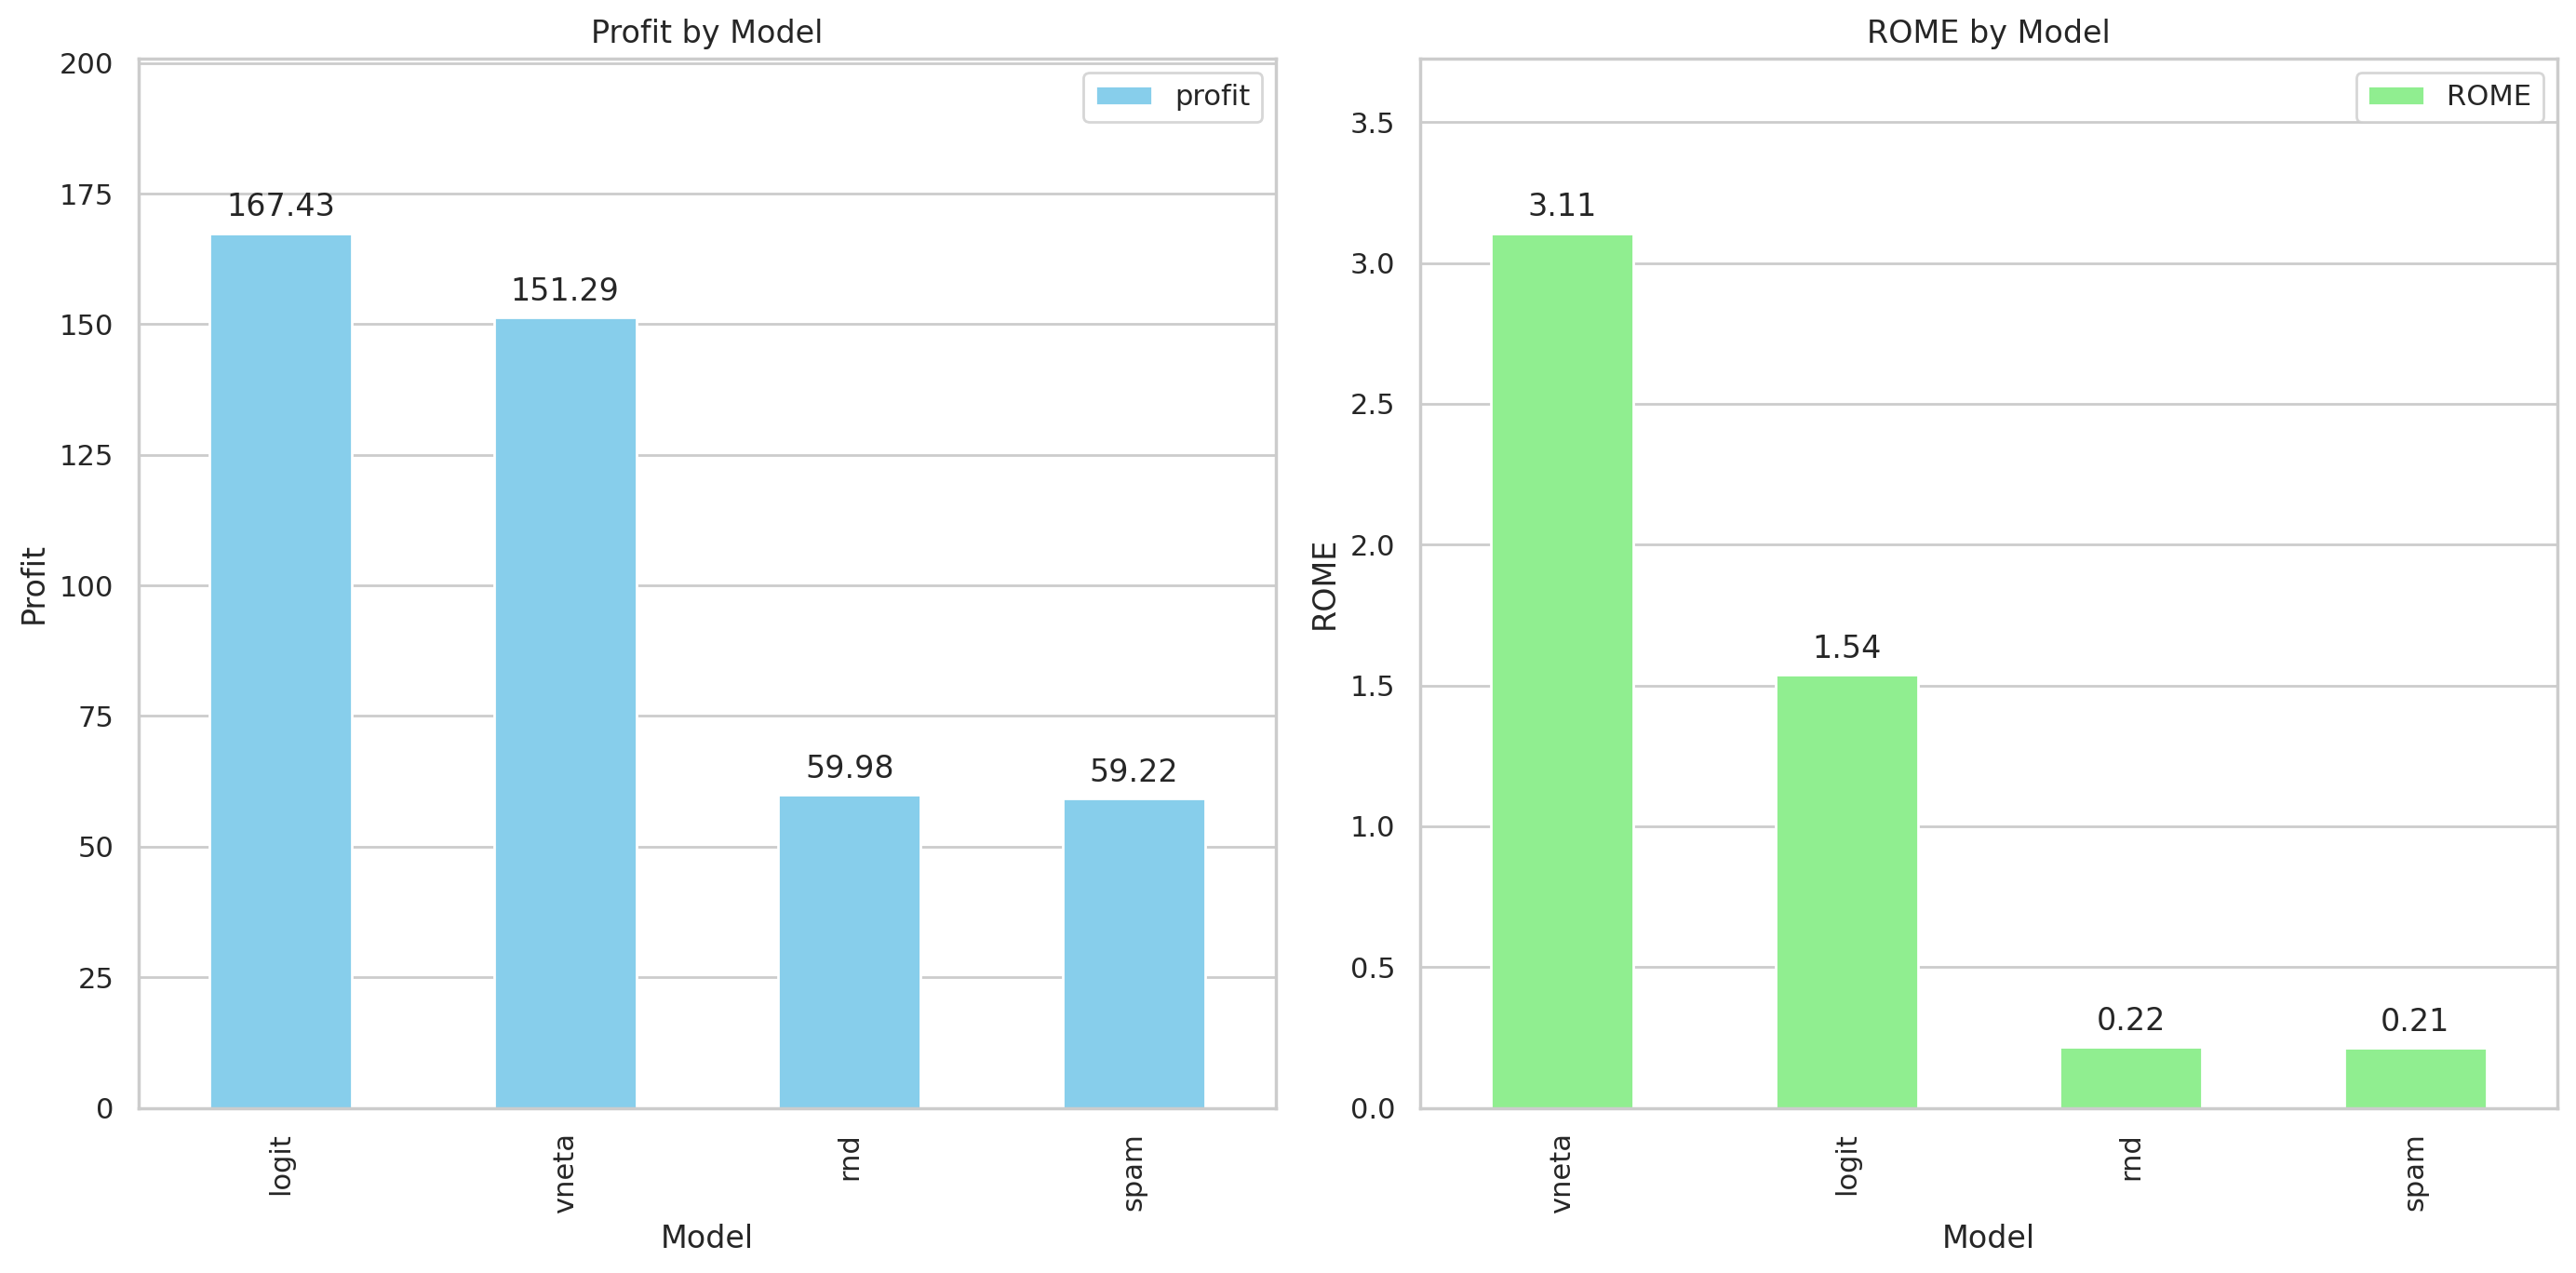

In [60]:
# Increase the figure size
plt.figure(figsize=(14, 7))

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Plotting profit
profit_bars = sorted_by_profit.plot(x='model', y='profit', kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Profit by Model')
axes[0].set_ylabel('Profit')
axes[0].set_xlabel('Model')
axes[0].grid(True, axis='y')  # Only horizontal grid lines
axes[0].xaxis.grid(False)  # Disable vertical grid lines
axes[0].set_ylim(0, sorted_by_profit['profit'].max() * 1.2)  # Add some space on top

# Annotate profit values on bars
for p in profit_bars.patches:
    profit_bars.annotate(f'{p.get_height():.2f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points')

# Plotting ROME
rome_bars = sorted_by_ROME.plot(x='model', y='ROME', kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('ROME by Model')
axes[1].set_ylabel('ROME')
axes[1].set_xlabel('Model')
axes[1].grid(True, axis='y')  # Only horizontal grid lines
axes[1].xaxis.grid(False)  # Disable vertical grid lines
axes[1].set_ylim(0, sorted_by_ROME['ROME'].max() * 1.2)  # Add some space on top

# Annotate ROME values on bars
for p in rome_bars.patches:
    rome_bars.annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

# Adjust layout to fit the plot
plt.tight_layout()

# Show plot
plt.show()

e. Based on the results from VI.d discuss which of these 4 approaches you would recommend and why (2 points)

Based on the above results, I would say the LOGIT and the Vneta Consulting Service model are the two best options. Both offer significantly higher financial returns in terms of profit (almost 3x) and ROME as compared to RND and Spamming. 

While logit yields the highest profit, the Vneta model offers the most "bang for your buck" and is the most efficient at utilising/maximising resources with almost a 2x ROME compared to Logit. So if the goal is to work with limited resources and to minimize cost, the Vneta model would be TZ gaming's best bet given its high ROME and also, the profit it yields is very close and comparable to the profit yielded by logit (at this scale). 

However, if maximising profit is the main objective and cost is not really a concern, then the logit model should be deployed. It will result in a higher cost base but yield maximum profit. 

Two important disclaimers/callouts:
-   We are assuming that we are not adding on the 50k and 150k cost of using logit and Vneta respectively. 
-   A test sample of <30k is a relatively small scale in the digital impresssions world

f. Calculate the profit and ROME implications for each of the 4 options mentioned in VI.d if TZ purchases 20-million impression for the upcoming ad campaign (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, you can adapt the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

#### Setting up another function to calc projected profit and ROME

In [61]:
len(tz_gaming_test)

27953

In [62]:
def project_profit_rome(model,df,target_col,cost_per_impression,conversion_rate,clv,nr_impression):
    
    target_df = df[df[target_col]]
    
    proj_nr_impression = nr_impression * (target_df.shape[0]/len(df)) #no of impressions sent out in this approach -- original targeting ratio * 20M
    response_rate = target_df['click_yes'].mean()# Calculate the mean of responses - this is the response rate
    nr_responses = response_rate * proj_nr_impression
    revenue = clv * nr_responses * conversion_rate
    cost = cost_per_impression * proj_nr_impression
    profit = revenue - cost
    ROME = profit/cost
    
    metrics_info = f"""
    ASSUMPTION: TZ Gaming buys {nr_impression:,.0f} impressions from Vneta\n
    Projected performance metrics of the {model} : \n
    Projected number of Impressions pushed: {proj_nr_impression:,.0f}
    Projected number of clicks (using response rate from test data): {nr_responses:,.3f}
    Expected Response Rate: {100 * response_rate:.2f}%
    Total projected Revenue: ${revenue:,.2f}
    Total projected Cost: ${cost:,.2f}
    Net Profit: ${profit:,.2f}
    Projected Return on Marketing Expenditure (ROME) for {model} is: {ROME:.2f}
    """

    print(metrics_info)
    return profit, ROME

In [63]:
# setting the number of impressions arg to 20M
nr_imp = 20e6

In [64]:
profit_spam_projected,ROME_spam_projected = project_profit_rome("spam model",tz_gaming_test, 'target_spam',cost_per_impression,conversion_rate,clv,nr_imp)


    ASSUMPTION: TZ Gaming buys 20,000,000 impressions from Vneta

    Projected performance metrics of the spam model : 

    Projected number of Impressions pushed: 20,000,000
    Projected number of clicks (using response rate from test data): 193,896.898
    Expected Response Rate: 0.97%
    Total projected Revenue: $242,371.12
    Total projected Cost: $200,000.00
    Net Profit: $42,371.12
    Projected Return on Marketing Expenditure (ROME) for spam model is: 0.21
    


In [65]:
profit_rnd_projected,ROME_rnd_projected = project_profit_rome("rnd model",tz_gaming_test, 'target_rnd',cost_per_impression,conversion_rate,clv,nr_imp)


    ASSUMPTION: TZ Gaming buys 20,000,000 impressions from Vneta

    Projected performance metrics of the rnd model : 

    Projected number of Impressions pushed: 19,945,623
    Projected number of clicks (using response rate from test data): 193,896.898
    Expected Response Rate: 0.97%
    Total projected Revenue: $242,371.12
    Total projected Cost: $199,456.23
    Net Profit: $42,914.89
    Projected Return on Marketing Expenditure (ROME) for rnd model is: 0.22
    


In [66]:
profit_logit_projected,ROME_logit_projected = project_profit_rome("logit model",tz_gaming_test, 'target_logit',cost_per_impression,conversion_rate,clv,nr_imp)


    ASSUMPTION: TZ Gaming buys 20,000,000 impressions from Vneta

    Projected performance metrics of the logit model : 

    Projected number of Impressions pushed: 7,785,926
    Projected number of clicks (using response rate from test data): 158,122.563
    Expected Response Rate: 2.03%
    Total projected Revenue: $197,653.20
    Total projected Cost: $77,859.26
    Net Profit: $119,793.94
    Projected Return on Marketing Expenditure (ROME) for logit model is: 1.54
    


In [67]:
profit_vneta_projected,ROME_vneta_projected = project_profit_rome("Vneta Consultancy service",tz_gaming_test, 'target_vneta',cost_per_impression,conversion_rate,clv,nr_imp)


    ASSUMPTION: TZ Gaming buys 20,000,000 impressions from Vneta

    Projected performance metrics of the Vneta Consultancy service : 

    Projected number of Impressions pushed: 3,485,136
    Projected number of clicks (using response rate from test data): 114,477.874
    Expected Response Rate: 3.28%
    Total projected Revenue: $143,097.34
    Total projected Cost: $34,851.36
    Net Profit: $108,245.98
    Projected Return on Marketing Expenditure (ROME) for Vneta Consultancy service is: 3.11
    


In [68]:
mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit_projected, profit_rnd_projected, profit_vneta_projected, profit_spam_projected],
        "ROME": [ROME_logit_projected, ROME_rnd_projected, ROME_vneta_projected, ROME_spam_projected]
    }
)
print(mod_perf_20M)

   model         profit      ROME
0  logit  119793.939828  1.538596
1    rnd   42914.892856  0.215159
2  vneta  108245.984331  3.105933
3   spam   42371.122956  0.211856


#### Plotting profit and ROME for 6F

In [71]:
# Sort the DataFrame by 'Profit' and 'ROME' in descending order
sorted_by_projected_profit = mod_perf_20M.sort_values(by='profit', ascending=False)
sorted_by_projected_ROME = mod_perf_20M.sort_values(by='ROME', ascending=False)

<Figure size 2800x1400 with 0 Axes>

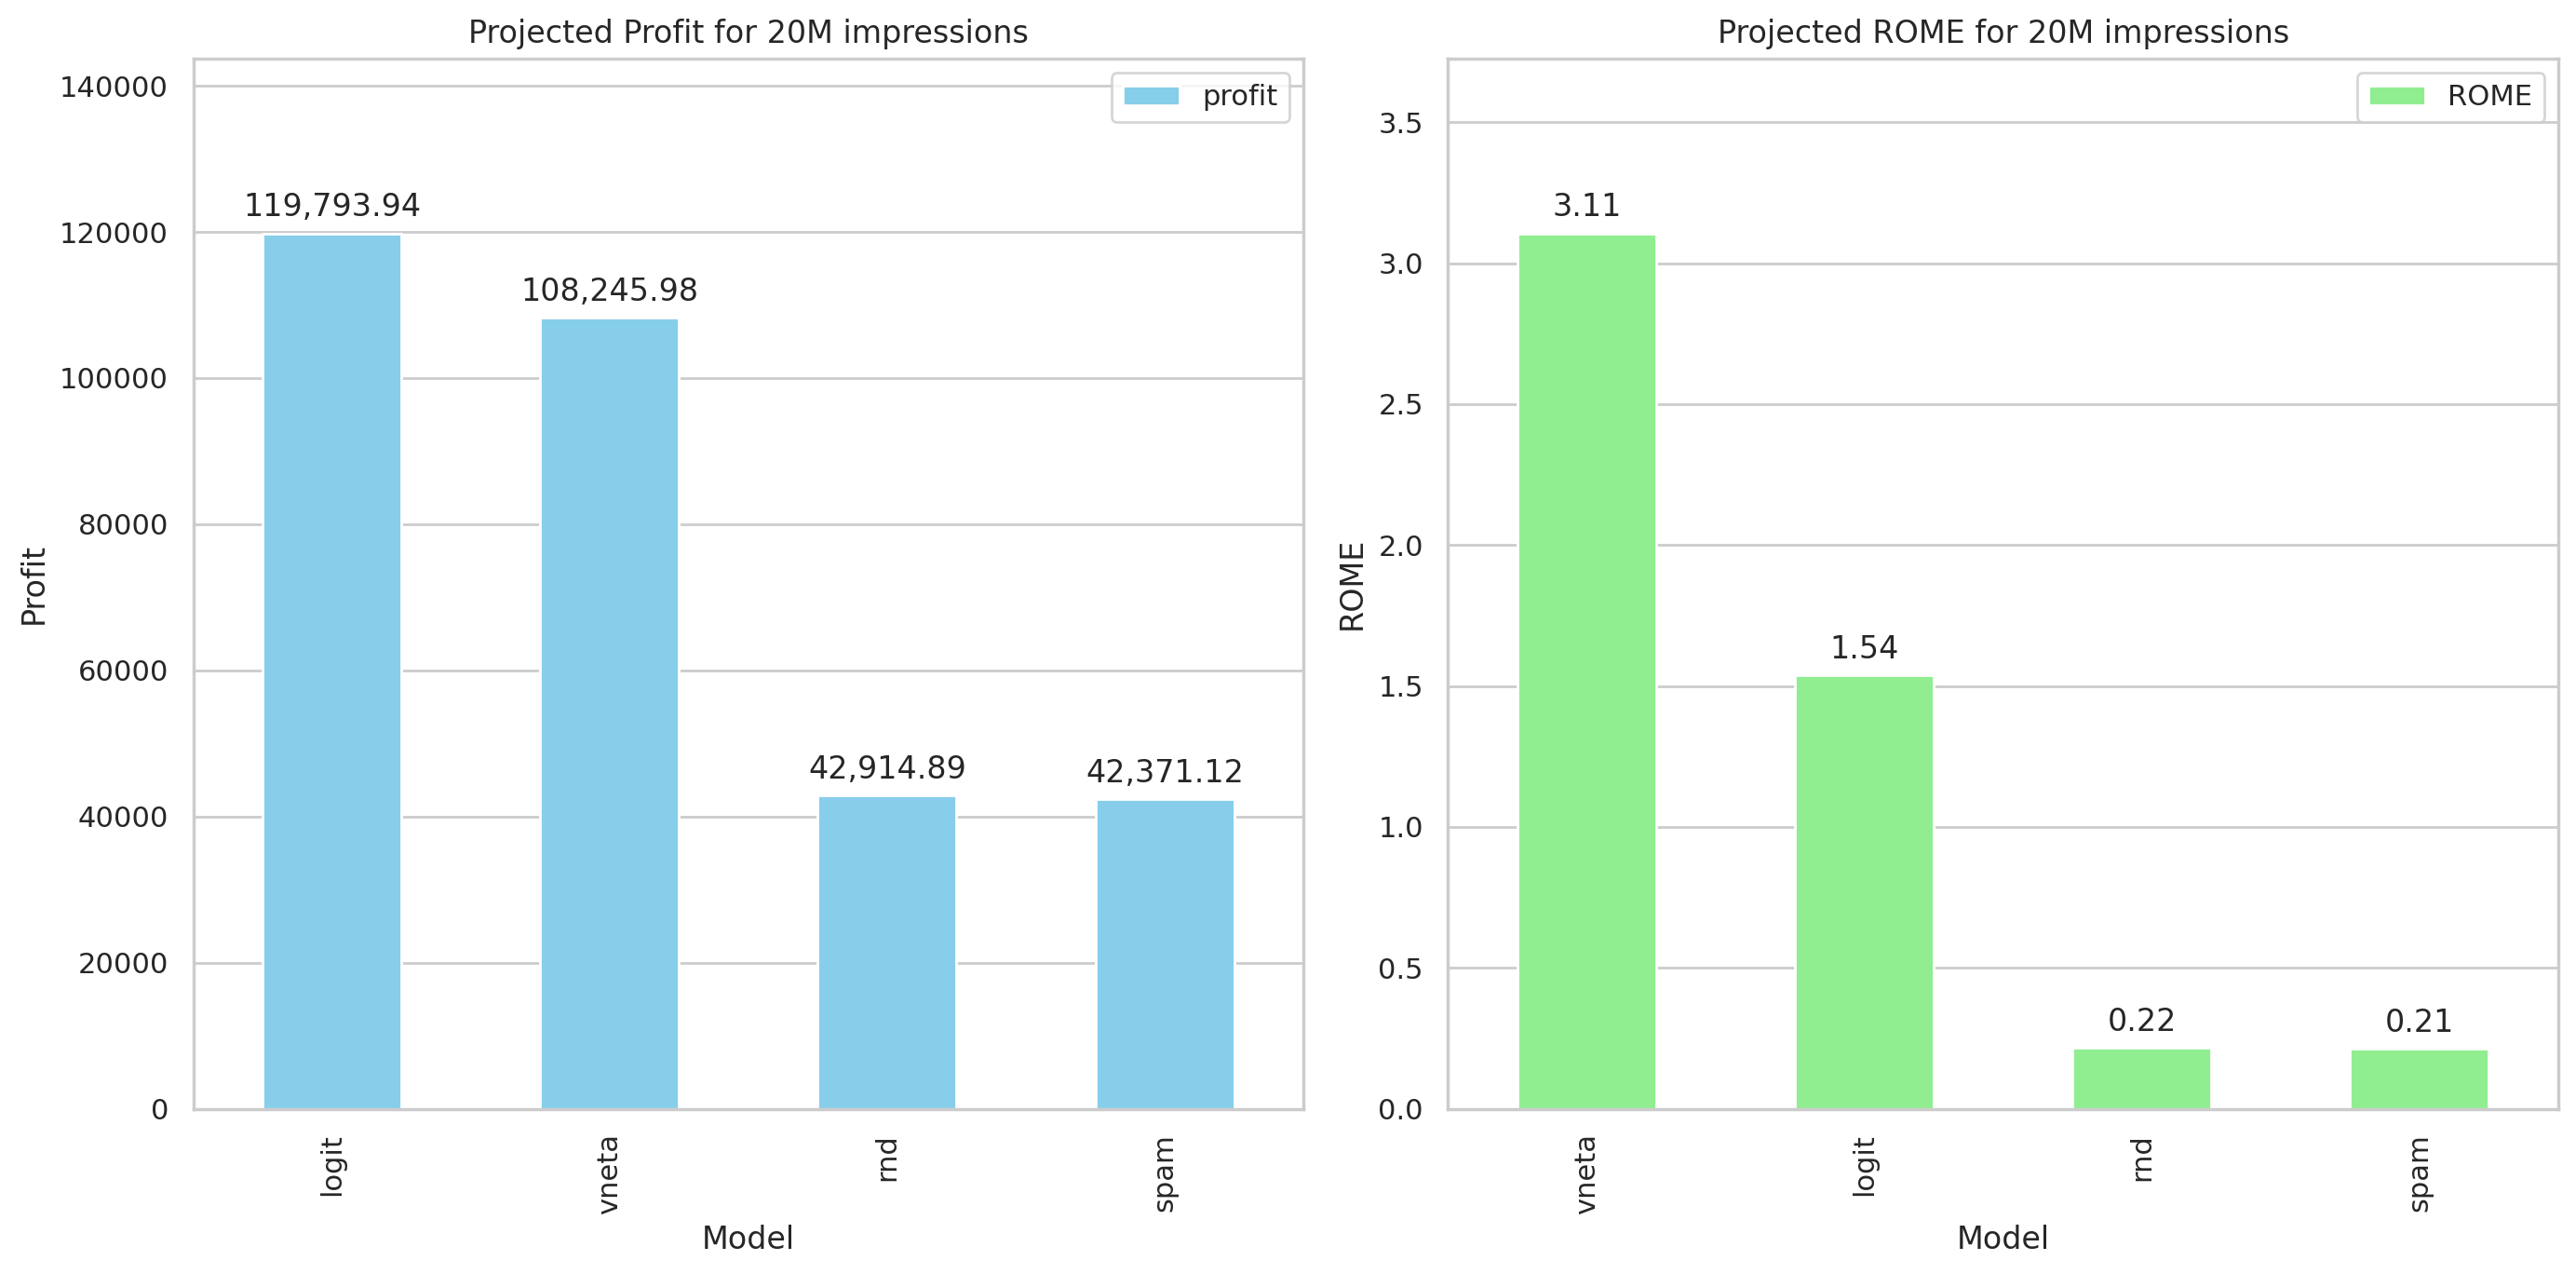

In [73]:
# Increase the figure size
plt.figure(figsize=(14, 7))

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Plotting profit
profit_bars = sorted_by_projected_profit.plot(x='model', y='profit', kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Projected Profit for 20M impressions')
axes[0].set_ylabel('Profit')
axes[0].set_xlabel('Model')
axes[0].grid(True, axis='y')  # Only horizontal grid lines
axes[0].xaxis.grid(False)  # Disable vertical grid lines
axes[0].set_ylim(0, sorted_by_projected_profit['profit'].max() * 1.2)  # Add some space on top

# Annotate profit values on bars
for p in profit_bars.patches:
    profit_bars.annotate(f'{p.get_height():,.2f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points')

# Plotting ROME
rome_bars = sorted_by_projected_ROME.plot(x='model', y='ROME', kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Projected ROME for 20M impressions')
axes[1].set_ylabel('ROME')
axes[1].set_xlabel('Model')
axes[1].grid(True, axis='y')  # Only horizontal grid lines
axes[1].xaxis.grid(False)  # Disable vertical grid lines
axes[1].set_ylim(0, sorted_by_projected_ROME['ROME'].max() * 1.2)  # Add some space on top

# Annotate ROME values on bars
for p in rome_bars.patches:
    rome_bars.annotate(f'{p.get_height():,.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

# Adjust layout to fit the plot
plt.tight_layout()

# Show plot
plt.show()

g. Based on the results from VI.f, discuss which of the 4 approaches you would recommend to put into production and why. Is your recommendation different from VI.e? Why (not) (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, consider adapting the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

While the overall outlook is the same as before projection, there are a few important things to notice. RND and Spamming virtually offer the same performance -- lowest profit and ROME. 

If we continue to assume that we are not to factor in the additional 50k and 150k cost for logit and vneta, then the following holds:
If maximising profit is the main objective for TZ gaming and cost is not a concern, then the logit model provides the best performance in terms of profit, almost 11.5k more than Vneta. However, if cost is a concern and TZ gaming is looking to maximise their resources, maintain a low cost base, and get the best value then the Vneta model with a ROME of 3.11 is the best option. 

If, however, we were to factor in the 50k and 150k cost of Logit and Vneta, then things get a little interesting. The additional 150k cost would make the Vneta model a loss making approach - TZ would lose money by using this model. However, Logit would continue to shine bright. Even after deducting 50k from Logit's profit, it will still yield the highest profit out of the 4 models and would be the best option for TZ both in terms of profit and ROME (Vneta's ROME would be negative)

## Part VII: Generative AI (5 points)

Please describe how you used Generative AI-tools like ChatGPT to support your work on this assignment. Provide pdfs and/or screenshots of your "discussions" with these tools and comment on what things did and did not go well. Also add any questions you may have about the assignment and the support you received from GenAI so we can discuss these topics in class.

Note: No matter how you used Generative AI-tools, you will be expected to fully understand all elements of the assignment. You may be called on in class to walk us through your thought process and how different parts of your code work.

https://chat.openai.com/share/eb51117d-f158-47e6-a532-7c4075e61e3e